## Table of content: 

* [Coingecko API](#A)
  *   [Getting all coins from each catego](#A1)
  *   [Diving into data](#A2)
  *   [Visualize total coins from each category ](#A3)
  *   [Visualize Marketcap for each category ](#A4)
  
  
* [Coinpaprika API](#B) 
* [Coinmarketcap CMC API ](#C) 
    * [Getting all coins from each catego](#C1)
    * [Further data processing](#C2)
    * [Diving into data category's details](#C3)
        * [Data Viz](#C4)
    * [Coins for each category](#C5)
        * [Data Viz](#C6)
    



<!-- To link the headings to TOC:
<a class="anchor" id="A"></a> -->


<!--     1. <a href="#A1">Xception Model </a>
    2. <a href="#A2">VGG16 Model </a>
    3. <a href="#A3">EfficientNetB4  </a>
    4. <a href="#A4">InceptionResNetV2  </a> -->

In [2]:
import requests
import json
import time
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import os 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

# Coingecko API <a class="anchor" id="A"></a>
Coingecko API Documentation: https://www.coingecko.com/en/api/documentation <br>
API Tutorial: https://www.dataquest.io/blog/python-api-tutorial/ <br>
Reading and writing JSON: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

In [3]:
# JSon formatting function
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=False, indent=4) #sort_keys=True
    print(text)

In [3]:
response = requests.get("https://api.coingecko.com/api/v3/ping")

In [7]:
res_json = response.json()

In [10]:
jprint(res_json)

{
    "gecko_says": "(V3) To the Moon!"
}


In [11]:
#Get categories 
response = requests.get("https://api.coingecko.com/api/v3/coins/categories/list")
res_json = response.json()
categories_list = jprint(res_json)

[
    {
        "category_id": "aave-tokens",
        "name": "Aave Tokens"
    },
    {
        "category_id": "analytics",
        "name": "Analytics"
    },
    {
        "category_id": "arbitrum-ecosystem",
        "name": "Arbitrum Ecosystem"
    },
    {
        "category_id": "artificial-intelligence",
        "name": "Artificial Intelligence"
    },
    {
        "category_id": "asset-backed-tokens",
        "name": "Asset-backed Tokens"
    },
    {
        "category_id": "asset-manager",
        "name": "Asset Manager"
    },
    {
        "category_id": "augmented-reality",
        "name": "Augmented Reality"
    },
    {
        "category_id": "automated-market-maker-amm",
        "name": "Automated Market Maker (AMM)"
    },
    {
        "category_id": "avalanche-ecosystem",
        "name": "Avalanche Ecosystem"
    },
    {
        "category_id": "axie-infinity",
        "name": "Axie Infinity"
    },
    {
        "category_id": "big-data",
        "name": "Big Data"
  

In [43]:
#loads to convert string to dict 
#The dumps() function of the json 
#        module dumps a dictionary into JSON contents, and returns a JSON string.
json_string = json.dumps(res_json)
print(json_string)


[{"category_id": "aave-tokens", "name": "Aave Tokens"}, {"category_id": "analytics", "name": "Analytics"}, {"category_id": "arbitrum-ecosystem", "name": "Arbitrum Ecosystem"}, {"category_id": "artificial-intelligence", "name": "Artificial Intelligence"}, {"category_id": "asset-backed-tokens", "name": "Asset-backed Tokens"}, {"category_id": "asset-manager", "name": "Asset Manager"}, {"category_id": "augmented-reality", "name": "Augmented Reality"}, {"category_id": "automated-market-maker-amm", "name": "Automated Market Maker (AMM)"}, {"category_id": "avalanche-ecosystem", "name": "Avalanche Ecosystem"}, {"category_id": "axie-infinity", "name": "Axie Infinity"}, {"category_id": "big-data", "name": "Big Data"}, {"category_id": "binance-launchpool", "name": "Binance Launchpool"}, {"category_id": "binance-smart-chain", "name": "Binance Smart Chain Ecosystem"}, {"category_id": "business-platform", "name": "Business Platform"}, {"category_id": "business-services", "name": "Business Services"}

In [44]:
# Saving the Json string formatted data in a file 
with open('categories_list.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [42]:
# Using a JSON string (This will update exisitng json file???)
# with open('categories_list.json', 'w') as outfile:
#     outfile.write(json_string)

In [16]:
#Loading json data from json file and convert to list/dict
with open('categories_list.json') as json_file:
    data = json.load(json_file) 
    data = json.loads(data) #this is crucial to parse it back to dictionary! 

In [17]:
for x in data:  
    print(x)
    print("")
    #print(list(x.values())[1])

{'category_id': 'aave-tokens', 'name': 'Aave Tokens'}

{'category_id': 'analytics', 'name': 'Analytics'}

{'category_id': 'arbitrum-ecosystem', 'name': 'Arbitrum Ecosystem'}

{'category_id': 'artificial-intelligence', 'name': 'Artificial Intelligence'}

{'category_id': 'asset-backed-tokens', 'name': 'Asset-backed Tokens'}

{'category_id': 'asset-manager', 'name': 'Asset Manager'}

{'category_id': 'augmented-reality', 'name': 'Augmented Reality'}

{'category_id': 'automated-market-maker-amm', 'name': 'Automated Market Maker (AMM)'}

{'category_id': 'avalanche-ecosystem', 'name': 'Avalanche Ecosystem'}

{'category_id': 'axie-infinity', 'name': 'Axie Infinity'}

{'category_id': 'big-data', 'name': 'Big Data'}

{'category_id': 'binance-launchpool', 'name': 'Binance Launchpool'}

{'category_id': 'binance-smart-chain', 'name': 'Binance Smart Chain Ecosystem'}

{'category_id': 'business-platform', 'name': 'Business Platform'}

{'category_id': 'business-services', 'name': 'Business Services'}


In [70]:
list(data[0].values())

['aave-tokens', 'Aave Tokens']

In [73]:
#Get categories with market data 
response = requests.get("https://api.coingecko.com/api/v3/coins/categories")
res_json = response.json()
jprint(res_json)

[
    {
        "content": "Smart contract platforms are usually blockchains that host smart contracts or decentralized applications. Users can interact with different smart contracts on these platforms to perform various actions such as lending and borrowing funds, staking their assets or minting NFTs.\r\n\r\nSmart contracts are programs that are stored on the blockchain and are automatically executed when certain conditions are met. To interact with these smart contracts, transaction fees may need to be paid and the amount and asset required will vary based on the platform\u2019s architecture. Usually, the smart contract platform\u2019s native token is used to pay for transaction fees. Some popular examples of smart contract platforms include Ethereum, Solana and Polygon.",
        "id": "smart-contract-platform",
        "market_cap": 631394665620.7482,
        "market_cap_change_24h": -1.3342788131861396,
        "name": "Smart Contract Platform",
        "top_3_coins": [
         

In [75]:
#Saving data as json file 
json_string = json.dumps(res_json)
with open('CG_categories_list_market_data.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [23]:
#Loading json data from json file and convert to list/dict
with open('CG_categories_list_market_data.json') as json_file:
    data = json.load(json_file) 
    data = json.loads(data) #this is crucial to parse it back to dictionary! 
    jprint(data)

[
    {
        "content": "Smart contract platforms are usually blockchains that host smart contracts or decentralized applications. Users can interact with different smart contracts on these platforms to perform various actions such as lending and borrowing funds, staking their assets or minting NFTs.\r\n\r\nSmart contracts are programs that are stored on the blockchain and are automatically executed when certain conditions are met. To interact with these smart contracts, transaction fees may need to be paid and the amount and asset required will vary based on the platform\u2019s architecture. Usually, the smart contract platform\u2019s native token is used to pay for transaction fees. Some popular examples of smart contract platforms include Ethereum, Solana and Polygon.",
        "id": "smart-contract-platform",
        "market_cap": 631394665620.7482,
        "market_cap_change_24h": -1.3342788131861396,
        "name": "Smart Contract Platform",
        "top_3_coins": [
         

In [22]:
for x in data:
    print(x['id'])
    print("")

smart-contract-platform

binance-smart-chain

polygon-ecosystem

avalanche-ecosystem

moonriver-ecosystem

fantom-ecosystem

stablecoins

arbitrum-ecosystem

near-protocol-ecosystem

exchange-based-tokens

decentralized-finance-defi

centralized-exchange-token-cex

xdai-ecosystem

cosmos-ecosystem

solana-ecosystem

cardano-ecosystem

non-fungible-tokens-nft

meme-token

dot-ecosystem

terra-ecosystem

governance

decentralized-exchange

play-to-earn

harmony-ecosystem

gaming

metaverse

yield-farming

automated-market-maker-amm

seigniorage

asset-backed-tokens

wrapped-tokens

finance-banking

internet-of-things-iot

privacy-coins

storage

oracle

lending-borrowing

eth-2-0-staking

decentralized-derivatives

sports

yield-aggregator

olympus-pro

masternodes

analytics

celo-ecosystem

yearn-yfi-partnerships-mergers

rebase-tokens

decentralized-perpetuals

synthetic-assets

oec-ecosystem

insurance

mev-protection

zilliqa-ecosystem

iotex-ecosystem

prediction-markets

decentral

#### Getting all coins from each categoy <a class="anchor" id="A1"></a>

In [5]:
# getting all categories from previous categories list and store them in a list

#read json file 
with open('CG_categories_list.json') as json_file:
    data = json.load(json_file) 
    data = json.loads(data) #this is crucial to parse it back to dictionary! 

In [10]:
%pprint
categories_list = [category['category_id'] for category in data]
display(len(categories_list))
categories_list


Pretty printing has been turned OFF


131

['aave-tokens', 'analytics', 'arbitrum-ecosystem', 'artificial-intelligence', 'asset-backed-tokens', 'asset-manager', 'augmented-reality', 'automated-market-maker-amm', 'avalanche-ecosystem', 'axie-infinity', 'big-data', 'binance-launchpool', 'binance-smart-chain', 'business-platform', 'business-services', 'cardano-ecosystem', 'celo-ecosystem', 'centralized-exchange-token-cex', 'charity', 'cny-stablecoin', 'collectibles', 'communication', 'compound-tokens', 'cosmos-ecosystem', 'cryptocurrency', 'daomaker-ecosystem', 'decentralized-exchange', 'decentralized-finance-defi', 'defi-index', 'decentralized-derivatives', 'education', 'energy', 'entertainment', 'etf', 'eth-2-0-staking', 'eur-stablecoin', 'exchange-based-tokens', 'fan-token', 'fantom-ecosystem', 'farming-as-a-service-faas', 'finance-banking', 'fractionalized-nft', 'gambling', 'gaming', 'gbp-stablecoin', 'gig-economy', 'xdai-ecosystem', 'governance', 'guild-scholarship', 'harmony-ecosystem', 'healthcare', 'heco-chain-ecosystem', 

In [21]:
# work around for error: ValueError: Value is too big!
pd.io.json._json.loads = lambda s, *a, **kw: json.loads(s)

# monkeypatch using faster simplejson module
import simplejson
pd.io.json._json.loads = lambda s, *a, **kw: simplejson.loads(s)

# normalising (unnesting) at the same time (for nested jsons)
pd.io.json._json.loads = lambda s, *a, **kw: pd.json_normalize(simplejson.loads(s))

In [22]:
# https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&category=aave-tokens&order=market_cap_desc&per_page=200&page=1&sparkline=false
main_url = 'https://api.coingecko.com/api/v3/'
json_d = {}
coin_in_category_df = pd.DataFrame()
for category in categories_list:
    endpoint_coin_in_category = f'coins/markets?vs_currency=usd&category={category}&order=market_cap_desc&sparkline=false'
    request_coin_in_category = requests.get(main_url + endpoint_coin_in_category)
    json_d[f'{category}_json'] = request_coin_in_category.json()
    time.sleep(30)
    try:
        temp_coin_in_category_df = pd.read_json(request_coin_in_category.text)
        temp_coin_in_category_df = temp_coin_in_category_df.sort_values('market_cap',ascending=False)
        temp_coin_in_category_df['category'] = category
        coin_in_category_df = pd.concat([coin_in_category_df, temp_coin_in_category_df],axis=0)
        
    except Exception as e: 
        print(e)

In [31]:
#saving df as csv 
coin_in_category_df.to_csv('CG_coins_by_category_raw.csv', index=False)

In [25]:
coin_in_category_df

id          symbol                 name  \
0   aave-amm-unicrvweth  aAmmUniCRVWETH  Aave AMM UniCRVWETH   
43         aave-link-v1           alink         Aave LINK v1   
49             aave-ren            aren             Aave REN   
48             aave-uni            auni             Aave UNI   
47            aave-gusd           agusd            Aave GUSD   
..                  ...             ...                  ...   
12                 zyro            zyro                 Zyro   
11                 bolt            bolt                 Bolt   
10            zilsurvey             srv            zilSurvey   
8             dmz-token             dmz            DMZ Token   
17              unifees            fees              Unifees   

                                                image  current_price  \
0   https://assets.coingecko.com/coins/images/1722...    1082.190000   
43  https://assets.coingecko.com/coins/images/1172...      16.480000   
49  https://assets.coingecko.com/coins/images/1424...       0.364278   
48  https://assets.coingecko.com/coins/images/1724...      10.940000   
47  https://assets.coingecko.com/coins/images/1724...       1.002000   
..                                                ...            ...   
12  https://assets.coingecko.com/coins/images/1246...       0.008629   
11  https://assets.coingecko.com/coins/images/4489...       0.004324   
10  https://assets.coingecko.com/coins/images/1645...       0.025951   
8   https://assets.coingecko.com/coins/images/1821...       0.211828   
17  https://assets.coingecko.com/coins/images/1881...       0.053768   

    market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0          0.0              NaN                      NaN          0.00   
43         0.0              NaN                      NaN      37761.00   
49         0.0              NaN                      NaN          0.00   
48         0.0              NaN                      NaN          0.00   
47         0.0              NaN                      NaN          0.00   
..         ...              ...                      ...           ...   
12         0.0              NaN                      NaN      76594.00   
11         0.0              NaN                      NaN     113358.00   
10         0.0              NaN                      NaN          2.59   
8          0.0              NaN                      NaN      14223.58   
17         0.0              NaN               53613099.0     209172.00   

       high_24h  ...                  ath_date         atl  \
0   1071.420000  ...  2021-11-25T18:08:41.020Z  495.190000   
43    16.480000  ...  2021-05-10T05:10:42.404Z   13.490000   
49     0.364252  ...  2021-10-02T20:07:44.357Z    0.244676   
48    10.940000  ...  2021-09-03T10:00:00.648Z    9.700000   
47     1.004000  ...  2021-09-13T14:00:13.084Z    0.972663   
..          ...  ...                       ...         ...   
12     0.008654  ...  2020-09-14T06:14:47.027Z    0.006270   
11     0.004459  ...  2019-04-30T12:51:49.465Z    0.000656   
10     0.026037  ...  2021-06-21T03:14:29.639Z    0.011872   
8      0.211936  ...  2021-09-12T17:02:50.416Z    0.168106   
17     0.060513  ...  2022-01-19T01:52:31.846Z    0.010187   

    atl_change_percentage                  atl_date  roi  \
0               118.12407  2021-07-21T20:07:00.680Z  NaN   
43               21.95741  2021-07-20T10:07:01.536Z  NaN   
49               48.60848  2022-01-24T13:07:34.991Z  NaN   
48               12.64944  2022-01-24T11:07:18.388Z  NaN   
47                2.85788  2021-12-04T05:02:13.560Z  NaN   
..                    ...                       ...  ...   
12               37.49961  2022-01-24T10:29:07.547Z  NaN   
11              557.99858  2020-03-30T06:25:07.099Z  NaN   
10              118.71706  2022-01-17T01:47:37.973Z  NaN   
8                25.96052  2022-02-03T10:36:56.804Z  NaN   
17              426.30395  2021-10-19T15:03:52.614Z  NaN   

                last_updated    

In [32]:
#Saving data as json file 
json_string = json.dumps(json_d)
with open('CG_coins_by_category_raw.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [33]:
with open('CG_coins_by_category_raw.json') as json_file:
    data = json.load(json_file) 
    data = json.loads(data) #this is crucial to parse it back to dictionary! 

#### Diving into data <a class="anchor" id="A2"></a>

In [142]:
df = pd.read_csv('CG_coins_by_category_raw.csv')
df.head()

id          symbol                 name  \
0  aave-amm-unicrvweth  aAmmUniCRVWETH  Aave AMM UniCRVWETH   
1         aave-link-v1           alink         Aave LINK v1   
2             aave-ren            aren             Aave REN   
3             aave-uni            auni             Aave UNI   
4            aave-gusd           agusd            Aave GUSD   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1722...    1082.190000   
1  https://assets.coingecko.com/coins/images/1172...      16.480000   
2  https://assets.coingecko.com/coins/images/1424...       0.364278   
3  https://assets.coingecko.com/coins/images/1724...      10.940000   
4  https://assets.coingecko.com/coins/images/1724...       1.002000   

   market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0         0.0              NaN                      NaN           0.0   
1         0.0              NaN                      NaN       37761.0   
2         0.0              NaN                      NaN           0.0   
3         0.0              NaN                      NaN           0.0   
4         0.0              NaN                      NaN           0.0   

      high_24h  ...                  ath_date         atl  \
0  1071.420000  ...  2021-11-25T18:08:41.020Z  495.190000   
1    16.480000  ...  2021-05-10T05:10:42.404Z   13.490000   
2     0.364252  ...  2021-10-02T20:07:44.357Z    0.244676   
3    10.940000  ...  2021-09-03T10:00:00.648Z    9.700000   
4     1.004000  ...  2021-09-13T14:00:13.084Z    0.972663   

   atl_change_percentage                  atl_date  roi  \
0              118.12407  2021-07-21T20:07:00.680Z  NaN   
1               21.95741  2021-07-20T10:07:01.536Z  NaN   
2               48.60848  2022-01-24T13:07:34.991Z  NaN   
3               12.64944  2022-01-24T11:07:18.388Z  NaN   
4                2.85788  2021-12-04T05:02:13.560Z  NaN   

               last_updated     category  roi.times  roi.currency  \
0  2022-02-15T04:08:23.664Z  aave-tokens        NaN           NaN   
1  2022-02-15T04:08:25.445Z  aave-tokens        NaN           NaN   
2  2022-02-15T04:08:24.649Z  aave-tokens        NaN           NaN   
3  2022-02-15T04:08:25.451Z  aave-tokens        NaN           NaN   
4  2022-02-15T04:08:25.429Z  aave-tokens        NaN           NaN   

   roi.percentage  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 30 columns]

In [4]:
#Check for duplicated Id 
pd.set_option('display.max_rows',5)
#df[df['category']=='us-election-2020']

df[df.duplicated(['id'])]#[df[df.duplicated(['id'])]['id']=='bitcoin']

#df.id.nunique()

id symbol          name  \
90       the-graph    grt     The Graph   
223   aave-busd-v1  abusd  Aave BUSD v1   
...            ...    ...           ...   
9498       zilliqa    zil       Zilliqa   
9500  xcad-network   xcad  XCAD Network   

                                                  image  current_price  \
90    https://assets.coingecko.com/coins/images/1339...       0.440536   
223   https://assets.coingecko.com/coins/images/1173...       1.000000   
...                                                 ...            ...   
9498  https://assets.coingecko.com/coins/images/2687...       0.049645   
9500  https://assets.coingecko.com/coins/images/1585...       4.640000   

        market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
90    2.708224e+09             52.0             4.398444e+09  9.020015e+07   
223   0.000000e+00              NaN                      NaN  6.675500e-02   
...            ...              ...                      ...           ...   
9498  6.915458e+08            124.0                      NaN  2.868695e+07   
9500  7.816926e+07            479.0                      NaN  2.176447e+06   

      high_24h  ...                  ath_date       atl  \
90    0.442801  ...  2021-02-12T07:28:45.775Z  0.103254   
223   1.010000  ...  2021-05-19T13:01:13.927Z  0.916981   
...        ...  ...                       ...       ...   
9498  0.049793  ...  2021-05-06T17:33:45.940Z  0.002396   
9500  4.630000  ...  2022-01-20T18:15:14.113Z  0.503462   

      atl_change_percentage                  atl_date  roi  \
90                327.95814  2020-12-17T21:28:41.332Z  NaN   
223                 8.86964  2020-08-02T04:48:42.157Z  NaN   
...                     ...                       ...  ...   
9498             1969.39776  2020-03-13T02:22:55.161Z  NaN   
9500              817.42291  2021-07-21T19:44:31.731Z  NaN   

                  last_updated             category  roi.times  roi.currency  \
90    2022-02-15T04:12:25.018Z   arbitrum-ecosystem        NaN           NaN   
223   2022-02-15T04:08:24.499Z  asset-backed-tokens        NaN           NaN   
...                        ...                  ...        ...           ...   
9498  2022-02-15T05:18:53.345Z    zilliqa-ecosystem    0.94066           eth   
9500  2022-02-15T05:18:19.717Z    zilliqa-ecosystem        NaN           NaN   

      roi.percentage  
90               NaN  
223              NaN  
...              ...  
9498       94.066013  
9500             NaN  

[3666 rows x 30 columns]

#### Visualize total coins from each category  <a class="anchor" id="A3"></a>

In [5]:
#To see number of coins from each category 
pd.set_option('display.max_rows', None)
df.groupby('category').count()[['id']].sort_values('id', ascending=False) #.loc[['us-election-2020']]

id
category                            
binance-smart-chain             2224
polygon-ecosystem                609
decentralized-finance-defi       400
non-fungible-tokens-nft          391
cryptocurrency                   367
avalanche-ecosystem              284
gaming                           234
yield-farming                    174
finance-banking                  174
fantom-ecosystem                 169
exchange-based-tokens            156
play-to-earn                     145
decentralized-exchange           140
governance                       138
smart-contract-platform          130
business-services                122
asset-backed-tokens              118
solana-ecosystem                 111
masternodes                      108
wormhole-assets                  108
business-platform                104
us-election-2020                 100
layer-1                          100
number                            99
realt-tokens                      98
meme-token                        92
entertainment                     85
dot-ecosystem                     81
xdai-ecosystem                    78
infrastructure                    77
stablecoins                       75
metaverse                         75
cosmos-ecosystem                  69
aave-tokens                       68
privacy-coins                     67
sports                            61
protocol                          60
automated-market-maker-amm        58
arbitrum-ecosystem                58
rebase-tokens                     56
launchpad                         54
fan-token                         54
lending-borrowing                 53
near-protocol-ecosystem           52
centralized-exchange-token-cex    51
yield-aggregator                  47
technology-science                41
moonriver-ecosystem               39
decentralized-derivatives         39
fractionalized-nft                38
oracle                            37
olympus-pro                       37
software                          37
gambling                          37
usd-stablecoin                    35
index-coin                        32
storage                           32
communication                     31
harmony-ecosystem                 30
artificial-intelligence           30
internet-of-things-iot            30
big-data                          29
media                             29
wrapped-tokens                    27
seigniorage                       27
collectibles                      26
social-money                      25
oec-ecosystem                     24
mirrored-assets                   24
insurance                         23
defi-index                        23
tourism                           22
heco-chain-ecosystem              22
terra-ecosystem                   20
charity                           19
kardiachain-ecosystem             19
zilliqa-ecosystem                 18
healthcare                        18
iotex-ecosystem                   18
energy                            16
asset-manager                     16
analytics                         15
decentralized-options             15
retail                            15
ohm-fork                          15
moonbeam-ecosystem                14
real-estate                       14
cardano-ecosystem                 14
leveraged-token                   14
synthetic-assets                  13
music                             13
synths                            11
decentralized-perpetuals          11
yearn-yfi-partnerships-mergers    11
education                         10
daomaker-ecosystem                10
mev-protection                    10
utokens                           10
celo-ecosystem                    10
guild-scholarship                  9
prediction-markets                 9
binance-launchpool                 9
tokenized-btc                      9
compound-tokens                    8
eur-stablecoin                     8
farming-as-a-service-faas          7
eth-2-0-staking                    7
w

C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


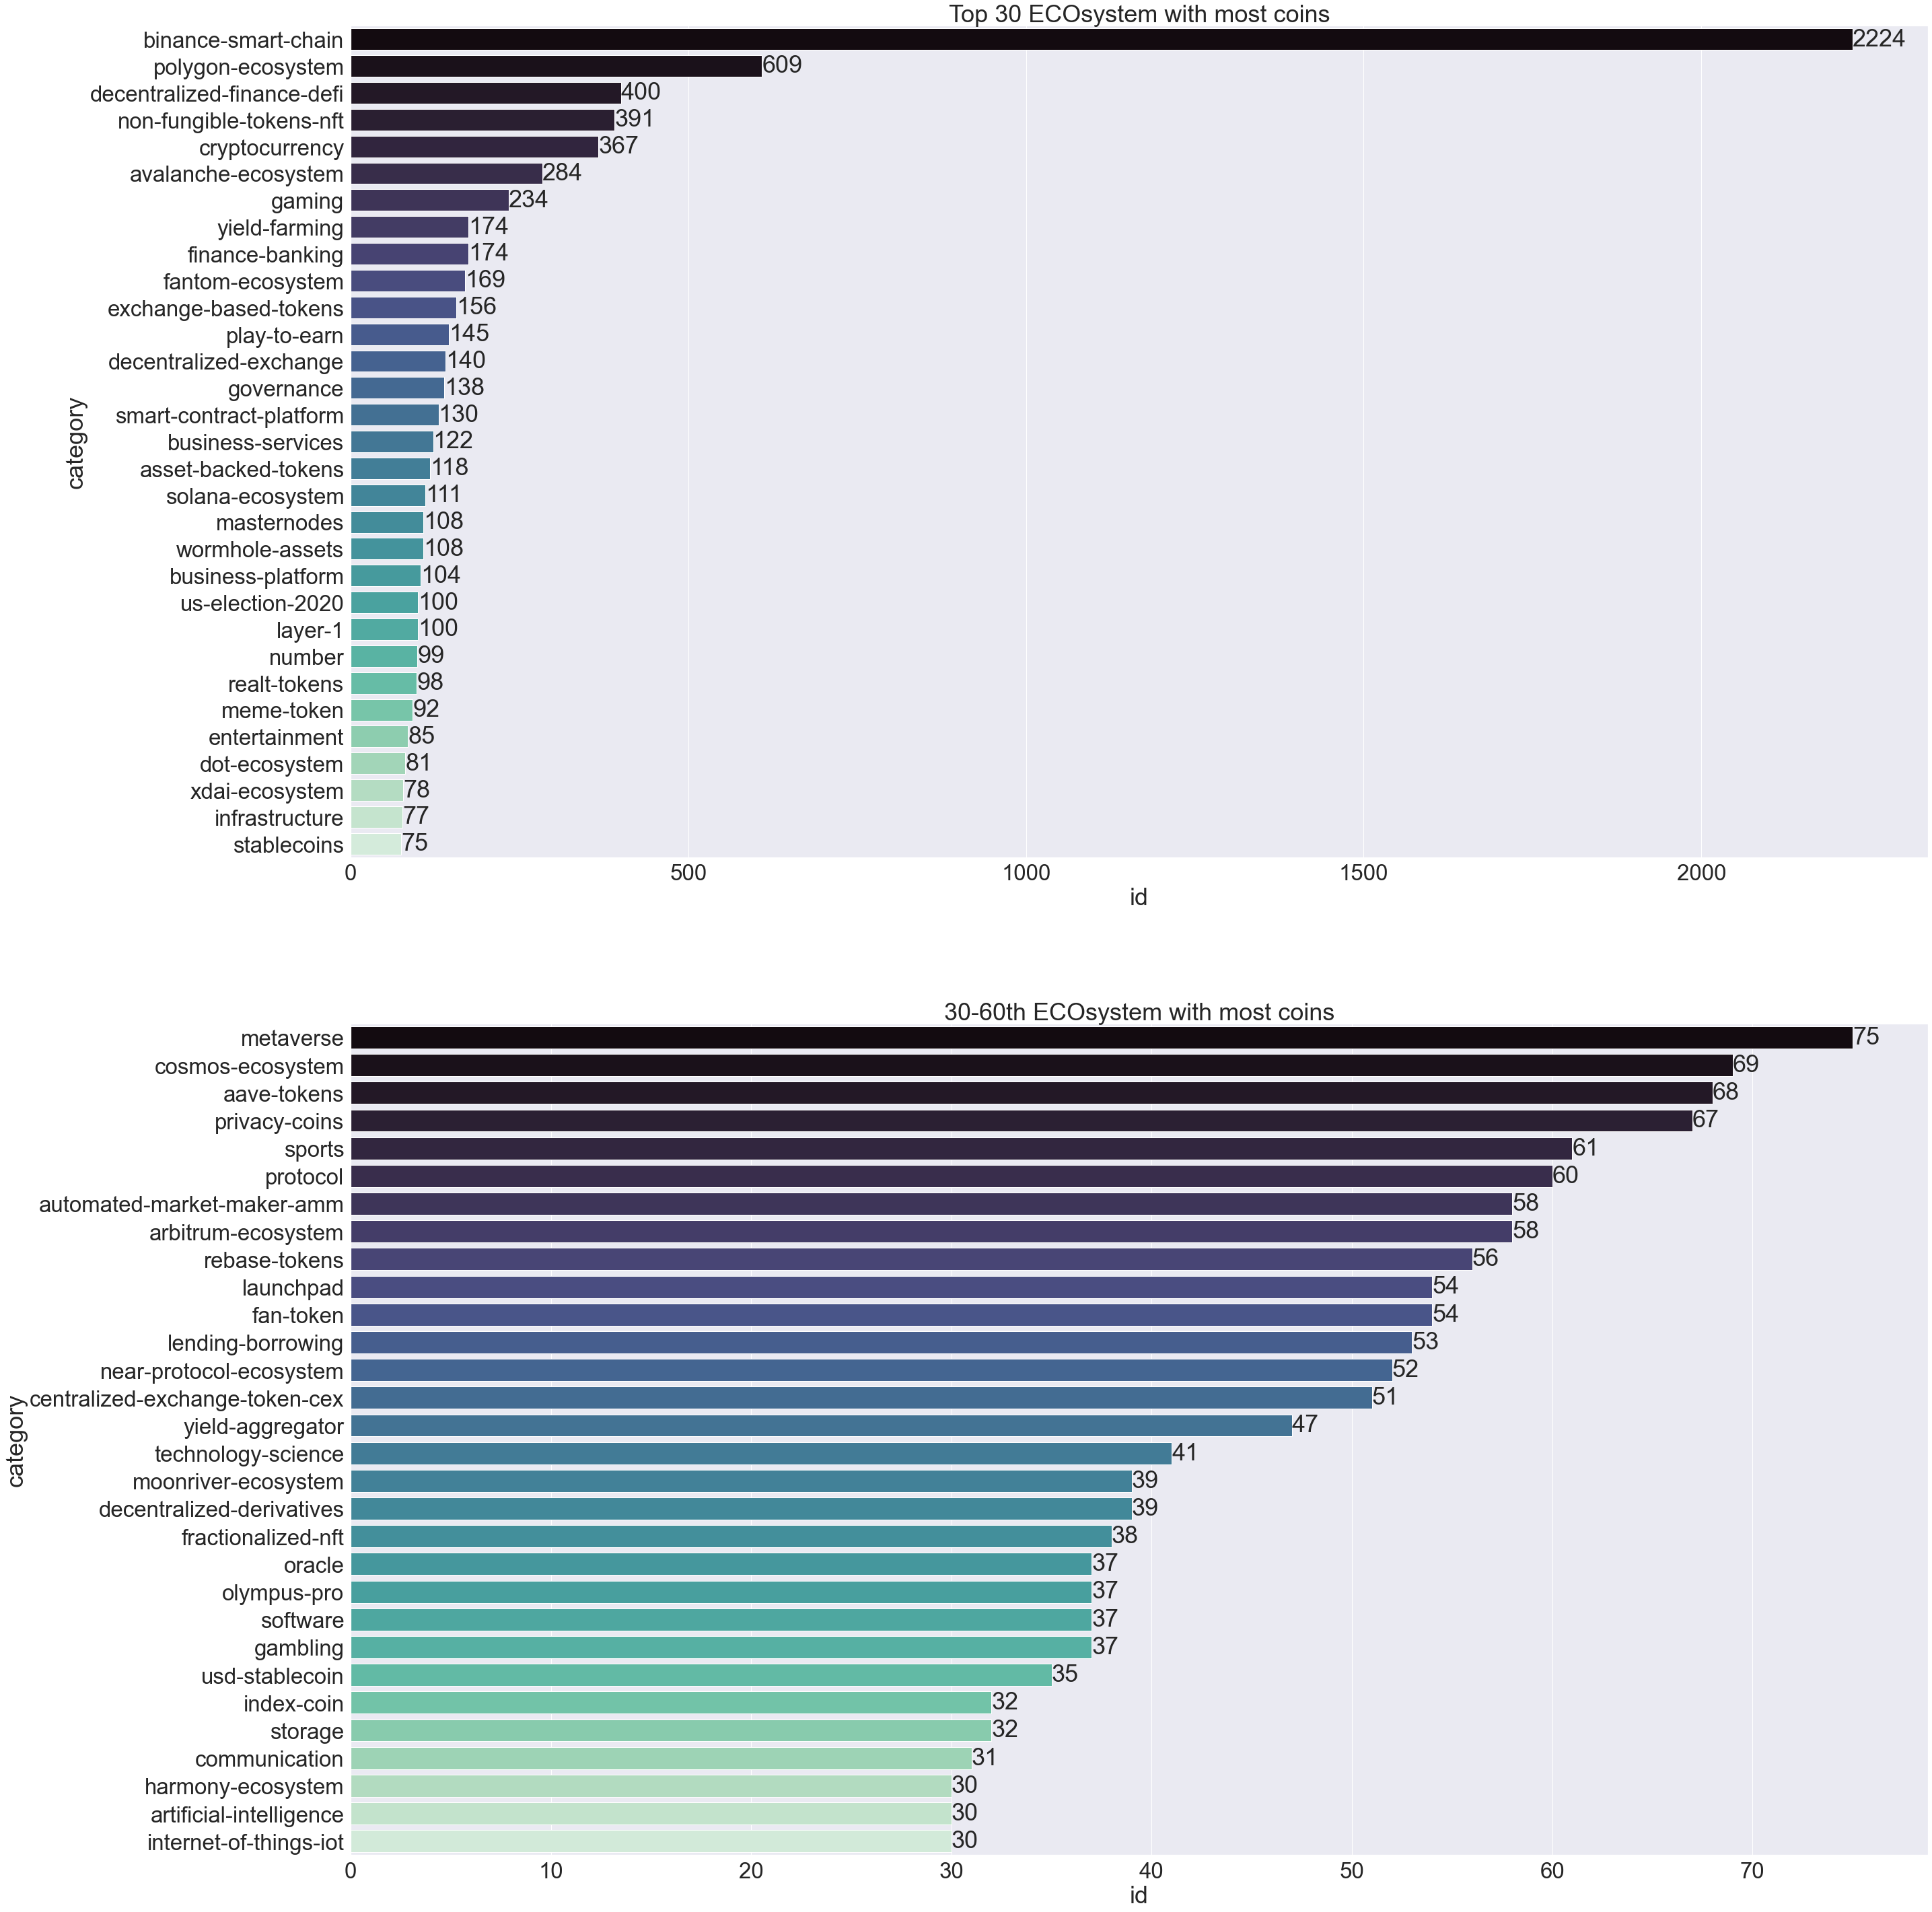

In [144]:
data = df.groupby('category').count()[['id']].sort_values('id', ascending=False)

fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize =(42,50))
sns.barplot( data.id[:31],data.index[:31], ax = ax, palette = "mako" )
sns.barplot( data.id[31:61],data.index[31:61], ax = ax1, palette = "mako" )
#ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0, 700))

ax.bar_label(ax.containers[0], label_type= 'edge')
ax.set_title("Top 30 ECOsystem with most coins")

ax1.bar_label(ax1.containers[0], label_type= 'edge')
ax1.set_title("30-60th ECOsystem with most coins")

sns.set(font_scale = 3)
plt.show()

#### Visualize marketcap of each category  <a class="anchor" id="A4"></a>

In [69]:
#To see marketcap of each category 
pd.set_option('display.max_rows', None)
data = df.groupby('category').sum()[['market_cap', 'market_cap_rank' ]].sort_values('market_cap', ascending=False)
data

market_cap  market_cap_rank
category                                                     
layer-1                         1.905286e+12           5050.0
us-election-2020                1.904881e+12           5050.0
cryptocurrency                  9.295561e+11         305790.0
smart-contract-platform         6.585366e+11          82442.0
binance-smart-chain             3.346067e+11         977714.0
polygon-ecosystem               3.073310e+11         550381.0
avalanche-ecosystem             2.953382e+11         151478.0
moonriver-ecosystem             2.839219e+11           9971.0
fantom-ecosystem                2.139804e+11          59324.0
stablecoins                     1.824653e+11          52111.0
arbitrum-ecosystem              1.799205e+11          26717.0
usd-stablecoin                  1.777077e+11          14936.0
near-protocol-ecosystem         1.728173e+11          24054.0
moonbeam-ecosystem              1.644296e+11           5977.0
exchange-based-tokens           1.263465e+11         130998.0
decentralized-finance-defi      1.132536e+11         411496.0
centralized-exchange-token-cex  1.062673e+11          21881.0
xdai-ecosystem                  8.578994e+10          62477.0
cosmos-ecosystem                5.489887e+10          40755.0
solana-ecosystem                5.007915e+10         100526.0
cardano-ecosystem               4.302687e+10           5947.0
non-fungible-tokens-nft         4.032017e+10         426214.0
meme-token                      3.796111e+10          72110.0
dot-ecosystem                   3.561164e+10          76820.0
terra-ecosystem                 3.438752e+10           8740.0
infrastructure                  2.541836e+10          64203.0
governance                      2.500934e+10         173103.0
decentralized-exchange          2.349857e+10         146064.0
play-to-earn                    2.172203e+10         104559.0
gaming                          2.116631e+10         189624.0
protocol                        2.087294e+10          42597.0
metaverse                       2.076267e+10          58373.0
harmony-ecosystem               2.057613e+10          12265.0
yield-farming                   1.947979e+10         280496.0
automated-market-maker-amm      1.595708e+10          58281.0
seigniorage                     1.542324e+10          46758.0
business-services               1.496496e+10         118630.0
asset-backed-tokens             1.467198e+10          59069.0
tokenized-btc                   1.407585e+10           5422.0
entertainment                   1.277406e+10          64275.0
wrapped-tokens                  1.229729e+10          10768.0
finance-banking                 1.201627e+10         140269.0
internet-of-things-iot          1.055632e+10          25481.0
privacy-coins                   1.044118e+10          69278.0
compound-tokens                 9.925726e+09           1601.0
storage                         9.796625e+09          23379.0
oracle                          9.209525e+09          43242.0
lending-borrowing               8.572377e+09          60528.0
eth-2-0-staking                 6.438130e+09           5262.0
business-platform               6.076889e+09         106378.0
axie-infinity                   5.213535e+09           2413.0
collectibles                    4.834998e+09          25990.0
artificial-intelligence         4.800547e+09          24201.0
decentralized-derivatives       4.030729e+09          38923.0
sports                          3.740623e+09          87333.0
yield-aggregator                3.564037e+09          69782.0
olympus-pro                     3.407952e+09          27490.0
masternodes                     3.169518e+09         124350.0
communication                   2.983836e+09          22934.0
analytics                       2.935847e+09          23935.0
celo-ecosystem                  2.493347e+09           6638.0
yearn-yfi-partnerships-mergers  2.354042e+09           7001.0
launchpad                       2.192788e+09          67828.0
dece

C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


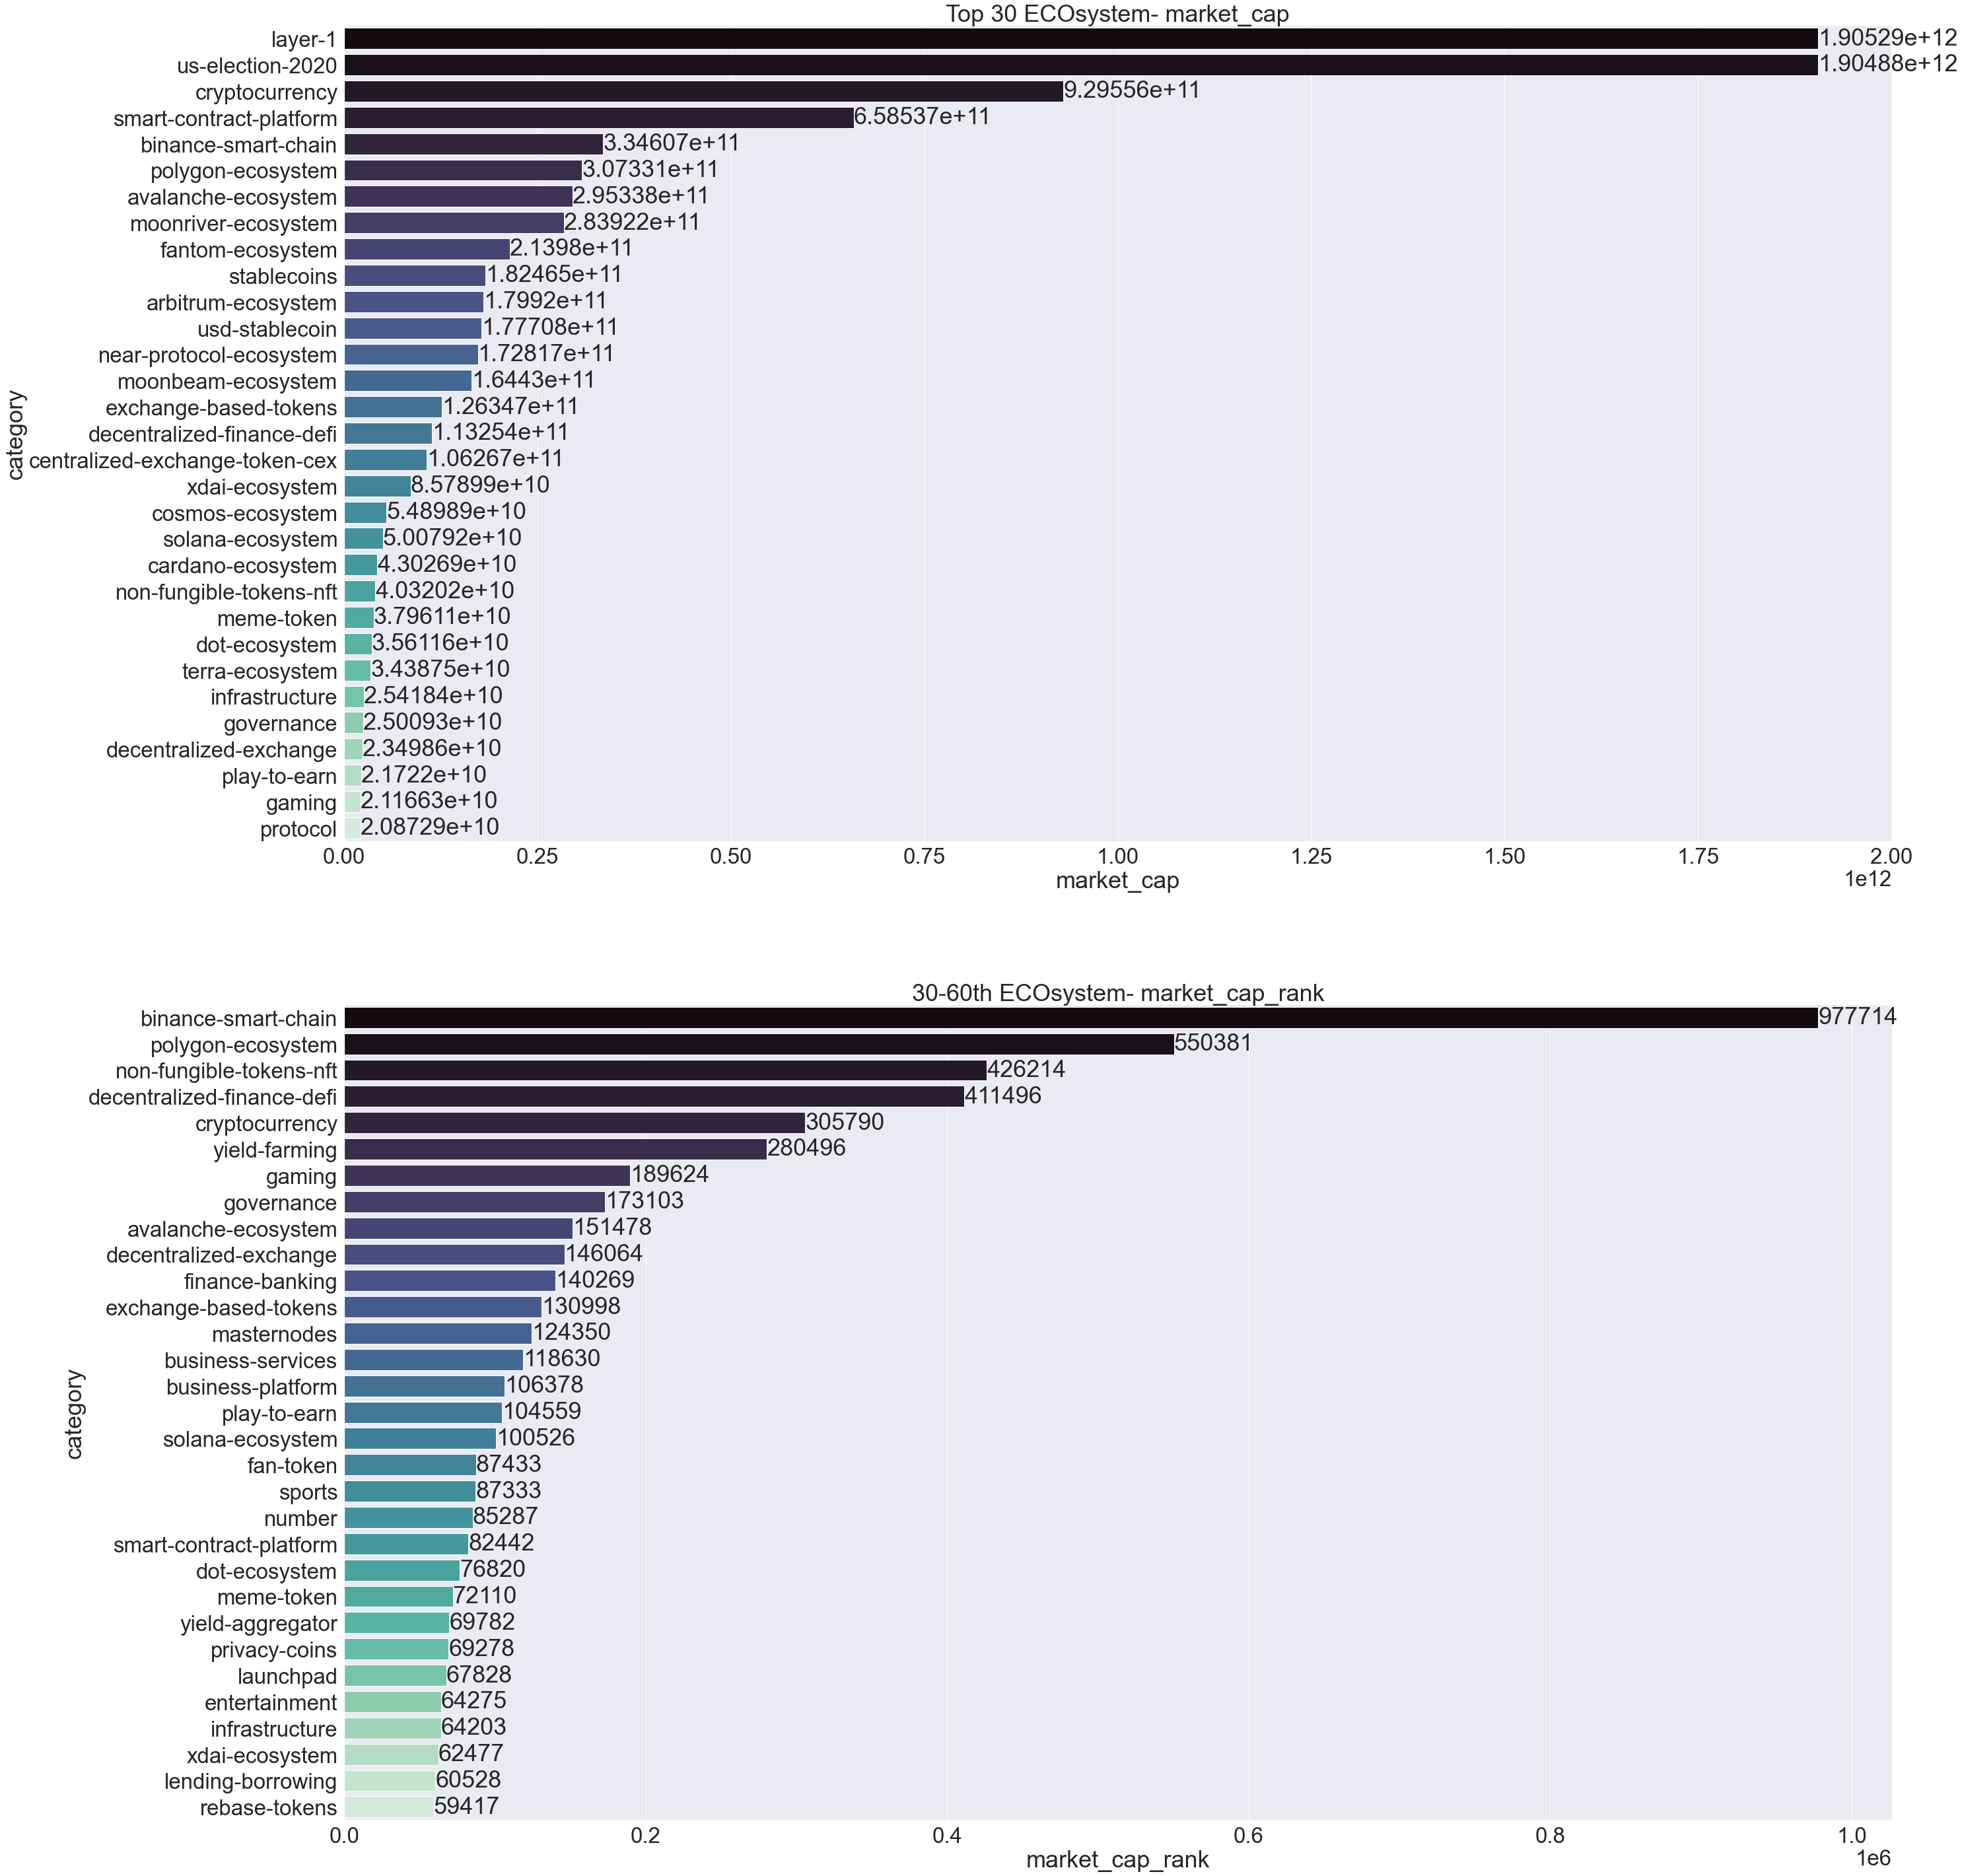

In [143]:
data = df.groupby('category').sum()[['market_cap', 'market_cap_rank' ]].sort_values('market_cap', ascending=False)
data2 = df.groupby('category').sum()[['market_cap', 'market_cap_rank' ]].sort_values('market_cap_rank', ascending=False)

fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize =(42,50))
sns.barplot( data.market_cap[:31],data.index[:31], ax = ax, palette = "mako" )
sns.barplot( data2.market_cap_rank[:31],data2.index[:31], ax = ax1, palette = "mako" )
#ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0, 700))

ax.bar_label(ax.containers[0], label_type= 'edge')
ax.set_title("Top 30 ECOsystem- market_cap")

ax1.bar_label(ax1.containers[0], label_type= 'edge')
ax1.set_title("30-60th ECOsystem- market_cap_rank")

sns.set(font_scale = 3)
plt.show()

## Trying out Coinpaprika API <a class="anchor" id="B"></a>
Source: https://api.coinpaprika.com/ 

In [7]:
#Get market overview data
response = requests.get("https://api.coinpaprika.com/v1/global")
res_json = response.json()
jprint(res_json)

{
    "bitcoin_dominance_percentage": 41.11,
    "cryptocurrencies_number": 9976,
    "last_updated": 1644856504,
    "market_cap_ath_date": "2021-10-27T07:40:00Z",
    "market_cap_ath_value": 3629384273801,
    "market_cap_change_24h": 0.91,
    "market_cap_usd": 1979963053519,
    "volume_24h_ath_date": "2021-05-02T17:00:00Z",
    "volume_24h_ath_value": 1388195572070,
    "volume_24h_change_24h": 1143.56,
    "volume_24h_percent_from_ath": -8.53,
    "volume_24h_percent_to_ath": 9.32,
    "volume_24h_usd": 1269825881131
}


## Coinmarketcap CMC API <a class="anchor" id="C"></a>
Source: https://coinmarketcap.com/api/documentation/v1#operation/getV1CryptocurrencyCategory

In [28]:

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/categories'
# parameters = {
#   'start':'1',
#   'limit':'5000',
#   'convert':'USD'
# }
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e621649a-d10f-493b-86aa-97ea5268ee4e',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url) #, params=parameters
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2022-02-17T07:12:48.817Z', 'error_code': 0, 'error_message': None, 'elapsed': 5, 'credit_count': 1, 'notice': None}, 'data': [{'id': '620a2bac3ee27777ad05bdaa', 'name': 'Injective Ecosystem', 'title': 'Injective Ecosystem', 'description': 'Injective Ecosystem', 'num_tokens': 63, 'avg_price_change': -0.11344041879310326, 'market_cap': 125334550771.79997, 'market_cap_change': -0.2208379310344828, 'volume': 8754086277.960018, 'volume_change': 8.03324827586207, 'last_updated': '2022-02-14T10:15:43.933Z'}, {'id': '61e7d42456acb5784136115f', 'name': 'Oxbull', 'title': 'Oxbull', 'description': 'Oxbull', 'num_tokens': 30, 'avg_price_change': 0.6938558036666667, 'market_cap': 220155558.36, 'market_cap_change': -0.11368333333333336, 'volume': 20015893.18908177, 'volume_change': 0.5759833333333332, 'last_updated': '2022-01-24T17:59:50.547Z'}, {'id': '61e65c64b3eb6864243277d7', 'name': 'OKEx Blockdream Ventures Portfolio', 'title': 'OKEx Blockdream Ventures Portfolio', 'd

In [29]:
jprint(data)

{
    "data": [
        {
            "avg_price_change": -0.11344041879310326,
            "description": "Injective Ecosystem",
            "id": "620a2bac3ee27777ad05bdaa",
            "last_updated": "2022-02-14T10:15:43.933Z",
            "market_cap": 125334550771.79997,
            "market_cap_change": -0.2208379310344828,
            "name": "Injective Ecosystem",
            "num_tokens": 63,
            "title": "Injective Ecosystem",
            "volume": 8754086277.960018,
            "volume_change": 8.03324827586207
        },
        {
            "avg_price_change": 0.6938558036666667,
            "description": "Oxbull",
            "id": "61e7d42456acb5784136115f",
            "last_updated": "2022-01-24T17:59:50.547Z",
            "market_cap": 220155558.36,
            "market_cap_change": -0.11368333333333336,
            "name": "Oxbull",
            "num_tokens": 30,
            "title": "Oxbull",
            "volume": 20015893.18908177,
            "volume_chang

In [30]:
# 151 categories returned! 
len(data['data'])

151

In [32]:
full_categories = [(x['name'], x['id']) for x in data['data']]
full_categories

[('Injective Ecosystem', '620a2bac3ee27777ad05bdaa'),
 ('Oxbull', '61e7d42456acb5784136115f'),
 ('OKEx Blockdream Ventures Portfolio', '61e65c64b3eb6864243277d7'),
 ('Elrond Ecosystem', '61de8db141de995812116a1f'),
 ('Spartan Group', '61dbdb5541de995812116695'),
 ('Moonriver Ecosystem', '61d923d341de9958121165fb'),
 ('VBC Ventures Portfolio', '61ada74c7828ce551835b031'),
 ('Kenetic Capital Portfolio', '61a461f8f13c3c06383f4224'),
 ('Harmony Ecosystem', '619f7223b02e240b33b7b8bc'),
 ('Protocol-Owned Liquidity', '619747686d73bb181e8d9109'),
 ('DeFi 2.0', '619724627efba823f81dbf9e'),
 ('BlueZilla', '619504a2f0cc180d721c639a'),
 ('Moon Knight Labs', '618fb9a45471091a7df361f3'),
 ('Ferrum Network', '618d78728b4c474d390bab72'),
 ('TRON Ecosystem', '618c0c528cd62978a89e554a'),
 ('Ethereum Ecosystem', '618c0beeb7dd913155b462f9'),
 ('Animoca Brands Portfolio', '6183ac1e55b4226c9d215182'),
 ('BullPerks Launchpad', '61792d831f475f1858a19f63'),
 ('MVB', '61790f5ab0c3953ace8c869a'),
 ('Farastarter'

In [89]:
df_full_categories = pd.DataFrame(full_categories, columns = ['Category', 'id'])
display(df_full_categories.head())
df_full_categories.to_csv("CMC_categories_list.csv",  index = False)

Category                        id
0                 Injective Ecosystem  620a2bac3ee27777ad05bdaa
1                              Oxbull  61e7d42456acb5784136115f
2  OKEx Blockdream Ventures Portfolio  61e65c64b3eb6864243277d7
3                    Elrond Ecosystem  61de8db141de995812116a1f
4                       Spartan Group  61dbdb5541de995812116695

In [2]:
cmc_api_key = os.environ['CMC2 API-2.17.22']

In [3]:
#Function to query by category ID 
def get_data_for_category(id): #'6051a81f66fc1b42617d6dbf'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/category'
    parameters = {
      'id': id
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': cmc_api_key,
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        cateogry_data = json.loads(response.text)
        return cateogry_data
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
get_data_for_category('6051a81f66fc1b42617d6dbf')

{'status': {'timestamp': '2022-02-17T08:50:09.115Z',
  'error_code': 0,
  'error_message': None,
  'elapsed': 20,
  'credit_count': 2,
  'notice': None},
 'data': {'id': '6051a81f66fc1b42617d6dbf',
  'name': 'E-commerce',
  'title': 'E-commerce',
  'description': 'E-commerce',
  'num_tokens': 25,
  'last_updated': '2021-11-10T10:35:34.071Z',
  'avg_price_change': -4.34026677909091,
  'market_cap': 148850832.06,
  'market_cap_change': -3.5361363636363636,
  'volume': 19998267.17924461,
  'volume_change': -19.863940909090907,
  'coins': [{'id': 8827,
    'name': 'Boson Protocol',
    'symbol': 'BOSON',
    'slug': 'boson-protocol',
    'num_market_pairs': 28,
    'date_added': '2021-03-16T00:00:00.000Z',
    'tags': ['marketplace',
     'collectibles-nfts',
     'e-commerce',
     'payments',
     'metaverse',
     'exnetwork-capital-portfolio',
     'play-to-earn'],
    'max_supply': 200000000,
    'circulating_supply': 69538644.18,
    'total_supply': 200000000,
    'platform': {'id': 

In [20]:
#look at the structure 
cateogry_data = get_data_for_category('6051a81f66fc1b42617d6dbf')
jprint(cateogry_data)

{
    "data": {
        "avg_price_change": -6.118673878636363,
        "coins": [
            {
                "circulating_supply": 69538644.18,
                "cmc_rank": 483,
                "date_added": "2021-03-16T00:00:00.000Z",
                "id": 8827,
                "is_active": 1,
                "is_fiat": 0,
                "last_updated": "2022-02-17T08:42:00.000Z",
                "max_supply": 200000000,
                "name": "Boson Protocol",
                "num_market_pairs": 28,
                "platform": {
                    "id": 1027,
                    "name": "Ethereum",
                    "slug": "ethereum",
                    "symbol": "ETH",
                    "token_address": "0xC477D038d5420C6A9e0b031712f61c5120090de9"
                },
                "quote": {
                    "USD": {
                        "fully_diluted_market_cap": 197118410.34,
                        "last_updated": "2022-02-17T08:42:00.000Z",
                  

In [65]:
#look at the structure 
for k, v in cateogry_data['data'].items():
    print(k)
    print(v)

id
6051a81f66fc1b42617d6dbf
name
E-commerce
title
E-commerce
description
E-commerce
num_tokens
25
last_updated
2021-11-10T10:35:34.071Z
avg_price_change
-5.348284848181817
market_cap
150499665.92999998
market_cap_change
-4.831463636363637
volume
19798341.31109616
volume_change
-21.272395454545457
coins
[{'id': 8827, 'name': 'Boson Protocol', 'symbol': 'BOSON', 'slug': 'boson-protocol', 'num_market_pairs': 28, 'date_added': '2021-03-16T00:00:00.000Z', 'tags': ['marketplace', 'collectibles-nfts', 'e-commerce', 'payments', 'metaverse', 'exnetwork-capital-portfolio', 'play-to-earn'], 'max_supply': 200000000, 'circulating_supply': 69538644.18, 'total_supply': 200000000, 'platform': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'slug': 'ethereum', 'token_address': '0xC477D038d5420C6A9e0b031712f61c5120090de9'}, 'is_active': 1, 'cmc_rank': 484, 'is_fiat': 0, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'last_updated': '2022-02-17T07:12:00.000Z', 'quote': {'US

In [21]:
cateogry_data['data'] #['coins'][21]

{'id': '6051a81f66fc1b42617d6dbf',
 'name': 'E-commerce',
 'title': 'E-commerce',
 'description': 'E-commerce',
 'num_tokens': 25,
 'last_updated': '2021-11-10T10:35:34.071Z',
 'avg_price_change': -6.118673878636363,
 'market_cap': 148734002.79999998,
 'market_cap_change': -5.369986363636364,
 'volume': 19960269.072337203,
 'volume_change': -20.102445454545453,
 'coins': [{'id': 8827,
   'name': 'Boson Protocol',
   'symbol': 'BOSON',
   'slug': 'boson-protocol',
   'num_market_pairs': 28,
   'date_added': '2021-03-16T00:00:00.000Z',
   'tags': ['marketplace',
    'collectibles-nfts',
    'e-commerce',
    'payments',
    'metaverse',
    'exnetwork-capital-portfolio',
    'play-to-earn'],
   'max_supply': 200000000,
   'circulating_supply': 69538644.18,
   'total_supply': 200000000,
   'platform': {'id': 1027,
    'name': 'Ethereum',
    'symbol': 'ETH',
    'slug': 'ethereum',
    'token_address': '0xC477D038d5420C6A9e0b031712f61c5120090de9'},
   'is_active': 1,
   'cmc_rank': 483,
 

#### Getting all coins from each categoy <a class="anchor" id="C1"></a>

In [8]:
df_full_categories = pd.read_csv("CMC_categories_list.csv")

In [5]:
for index, row in df_full_categories.iterrows():
    print(row['Category'], row['id'])
    if (index ==5): break

Injective Ecosystem 620a2bac3ee27777ad05bdaa
Oxbull 61e7d42456acb5784136115f
OKEx Blockdream Ventures Portfolio 61e65c64b3eb6864243277d7
Elrond Ecosystem 61de8db141de995812116a1f
Spartan Group 61dbdb5541de995812116695
Moonriver Ecosystem 61d923d341de9958121165fb


In [6]:
json_d = {}
for index, row in df_full_categories.iterrows():
    try:
        json_d[row['Category']] = get_data_for_category(row['id'])
        time.sleep(10)
        print(f"{index}. Added {row['Category']} successfully")
    except Exception as e:
        print(e)
    #json_d[ f'{ row['Category']}' ]

0. Added Injective Ecosystem successfully
1. Added Oxbull successfully
2. Added OKEx Blockdream Ventures Portfolio successfully
3. Added Elrond Ecosystem successfully
4. Added Spartan Group successfully
5. Added Moonriver Ecosystem successfully
6. Added VBC Ventures Portfolio successfully
7. Added Kenetic Capital Portfolio successfully
8. Added Harmony Ecosystem successfully
9. Added Protocol-Owned Liquidity successfully
10. Added DeFi 2.0 successfully
11. Added BlueZilla successfully
12. Added Moon Knight Labs successfully
13. Added Ferrum Network successfully
14. Added TRON Ecosystem successfully
15. Added Ethereum Ecosystem successfully
16. Added Animoca Brands Portfolio successfully
17. Added BullPerks Launchpad successfully
18. Added MVB successfully
19. Added Farastarter successfully
20. Added LaunchZone successfully
21. Added Celo Ecosystem successfully
22. Added Near Protocol Ecosystem successfully
23. Added Web3 successfully
24. Added Olympus Pro Ecosystem successfully
25. Add

In [25]:
#Saving it as a json file 
with open('CMC_coins_by_category_raw.json', 'w') as outfile:
    json.dump(json_d, outfile)

#### Further processing  <a class="anchor" id="C2"></a>

In [145]:
df_full_categories = pd.read_csv("CMC_categories_list.csv")
# Reading the saved Json file
with open('CMC_coins_by_category_raw.json') as json_file:
    data = json.load(json_file) 
#     data = json.loads(data) #this is crucial to parse it back to dictionary! 

In [75]:
data.keys()

dict_keys(['Injective Ecosystem', 'Oxbull', 'OKEx Blockdream Ventures Portfolio', 'Elrond Ecosystem', 'Spartan Group', 'Moonriver Ecosystem', 'VBC Ventures Portfolio', 'Kenetic Capital Portfolio', 'Harmony Ecosystem', 'Protocol-Owned Liquidity', 'DeFi 2.0', 'BlueZilla', 'Moon Knight Labs', 'Ferrum Network', 'TRON Ecosystem', 'Ethereum Ecosystem', 'Animoca Brands Portfolio', 'BullPerks Launchpad', 'MVB', 'Farastarter', 'LaunchZone', 'Celo Ecosystem', 'Near Protocol Ecosystem', 'Web3', 'Olympus Pro Ecosystem', 'Terra Ecosystem', 'Cardano Ecosystem', 'Icetea Labs', 'Play To Earn', 'Fantom Ecosystem', 'PetRock Capital Portfolio', 'Doggone Doggerel', 'Bounce Launchpad', 'Polygon Ecosystem', 'Genpad', 'Chromia Ecosystem', 'HECO Ecosystem', 'PolkaFoundry Red Kite', 'Hacken Foundation', 'Trustswap Launchpad', 'Exnetwork Capital Portfolio', 'Poolz Finance Portfolio', 'DuckSTARTER', 'Paradigm Portfolio', 'ParaFi Capital', 'Multicoin Capital Portfolio', 'Pantera Capital Portfolio', 'Placeholder V

In [146]:
n = 0 
for x, v in data.items():
    print(x)
    jprint(v)
    break

Injective Ecosystem
{
    "status": {
        "timestamp": "2022-02-17T08:50:17.929Z",
        "error_code": 0,
        "error_message": null,
        "elapsed": 23,
        "credit_count": 2,
        "notice": null
    },
    "data": {
        "id": "620a2bac3ee27777ad05bdaa",
        "name": "Injective Ecosystem",
        "title": "Injective Ecosystem",
        "description": "Injective Ecosystem",
        "num_tokens": 63,
        "last_updated": "2022-02-14T10:15:43.933Z",
        "avg_price_change": -1.5472066646296294,
        "market_cap": 526371754631.18,
        "market_cap_change": -1.6702222222222223,
        "volume": 70734129050.72945,
        "volume_change": 5.645616666666666,
        "coins": [
            {
                "id": 1027,
                "name": "Ethereum",
                "symbol": "ETH",
                "slug": "ethereum",
                "num_market_pairs": 5508,
                "date_added": "2015-08-07T00:00:00.000Z",
                "tags": [
       

In [77]:
jprint(data['Injective Ecosystem']['data'])

{
    "id": "620a2bac3ee27777ad05bdaa",
    "name": "Injective Ecosystem",
    "title": "Injective Ecosystem",
    "description": "Injective Ecosystem",
    "num_tokens": 63,
    "last_updated": "2022-02-14T10:15:43.933Z",
    "avg_price_change": -1.5472066646296294,
    "market_cap": 526371754631.18,
    "market_cap_change": -1.6702222222222223,
    "volume": 70734129050.72945,
    "volume_change": 5.645616666666666,
    "coins": [
        {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "slug": "ethereum",
            "num_market_pairs": 5508,
            "date_added": "2015-08-07T00:00:00.000Z",
            "tags": [
                "mineable",
                "pow",
                "smart-contracts",
                "ethereum-ecosystem",
                "binance-smart-chain",
                "coinbase-ventures-portfolio",
                "three-arrows-capital-portfolio",
                "polychain-capital-portfolio",
               

#### Diving into data category's  details <a class="anchor" id="C3"></a>
`['id', 'num_tokens', 'market_cap', 'volume', 'last_updated']`


In [80]:
#practice, inserting data to df 
temp_df = pd.DataFrame()

num_token = data['Injective Ecosystem']['data']['num_tokens']
market_cap = data['Injective Ecosystem']['data']['market_cap']
volume = data[x]['data']['volume']

## Not sure why below method doesnt work, the dict method works tho.. 
# temp_df['volume'] = volume
# temp_df['num_tokens'] = num_token
# temp_df['market_cap'] = market_cap

## Dict method
dict_sd = {'num_token':data['Injective Ecosystem']['data']['num_tokens'],
    'market_cap':data['Injective Ecosystem']['data']['market_cap'],
        'volume':data[x]['data']['volume']}
# temp_df = temp_df.append(dict_sd, ignore_index = True)
# display(temp_df)

## Dict method works, but I cant append list below to DF as row, can append as column tho.. 
## Alternatively, I can also append everything to a list then create a dataframe 
list_sd = [[num_token, market_cap, volume]]
df=pd.DataFrame(list_sd,columns=['num_token','market_cap', 'volume'])
df

# This works too appending by locating the latest new row index and insert data. 
temp_df = pd.DataFrame(columns=column_names)
list_sd = [num_token, market_cap, volume]
temp_df.loc[len(temp_df)] = list_sd
temp_df

num_token    market_cap        volume
0         63  5.263718e+11  7.073413e+10

In [108]:
category_list = df_full_categories.Category.to_list()
column_names = ['id', 'num_tokens', 'market_cap', 'volume', 'last_updated']
full_coin_cat_df = pd.DataFrame(columns=column_names)

for x in category_list: 
    temp_df = pd.DataFrame(columns=column_names)
    temp_df.loc[len(temp_df)] = [x,
                                data[x]['data']['num_tokens'],
                                data[x]['data']['market_cap'],
                                data[x]['data']['volume'],
                                data[x]['data']['last_updated']]
    full_coin_cat_df = pd.concat([temp_df, full_coin_cat_df], axis=0)

In [189]:
display(full_coin_cat_df.shape)
full_coin_cat_df = full_coin_cat_df.sort_values(by = 'market_cap', ascending=False)
full_coin_cat_df.to_csv("CMC_category_details.csv", index=False)

(151, 5)

#### Data Viz <a class="anchor" id="C4"></a>

C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


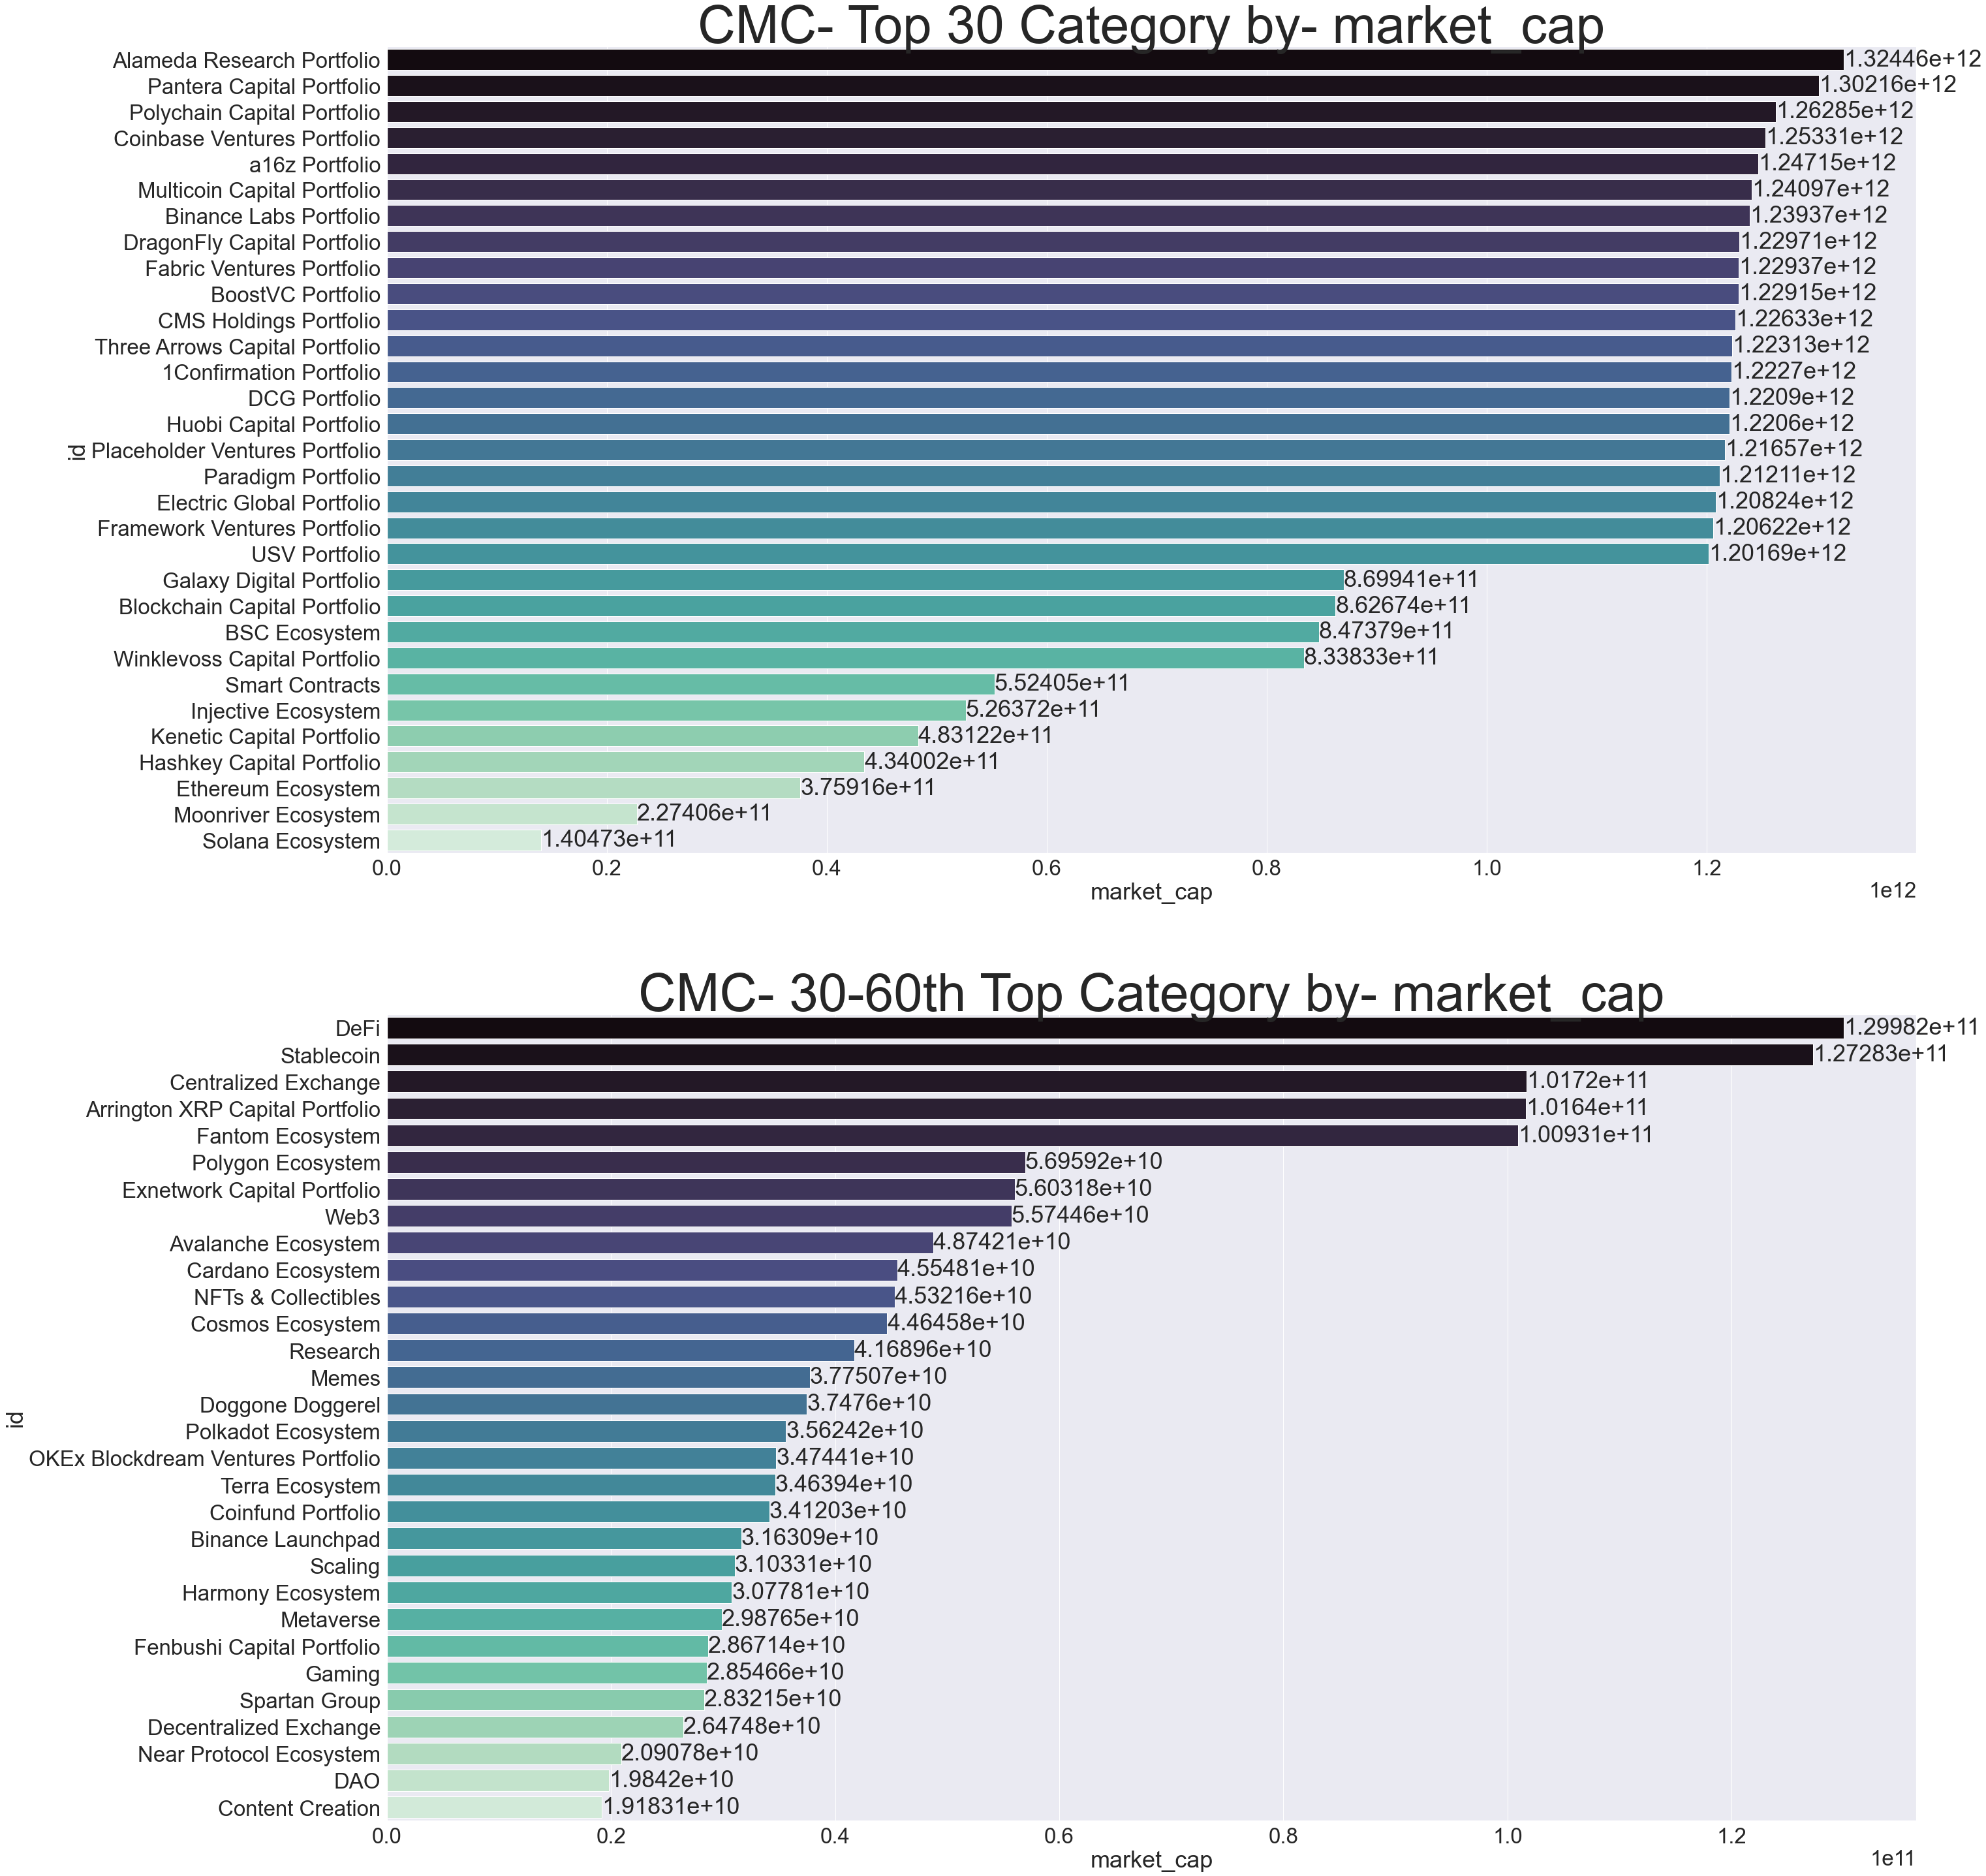

In [140]:
full_coin_cat_df = full_coin_cat_df.sort_values(by = 'market_cap', ascending=False)
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize =(42,50))
sns.barplot( full_coin_cat_df.market_cap[:31],full_coin_cat_df.id[:31], ax = ax, palette = "mako" )
sns.barplot( full_coin_cat_df.market_cap[31:61],full_coin_cat_df.id[31:61], ax = ax1, palette = "mako" )
#ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0, 700))

ax.bar_label(ax.containers[0], label_type= 'edge')
ax.set_title("CMC- Top 30 Category by- market_cap",fontsize=80)

ax1.bar_label(ax1.containers[0], label_type= 'edge')
ax1.set_title("CMC- 30-60th Top Category by- market_cap",fontsize=80)

sns.set(font_scale = 3)
plt.show()

C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


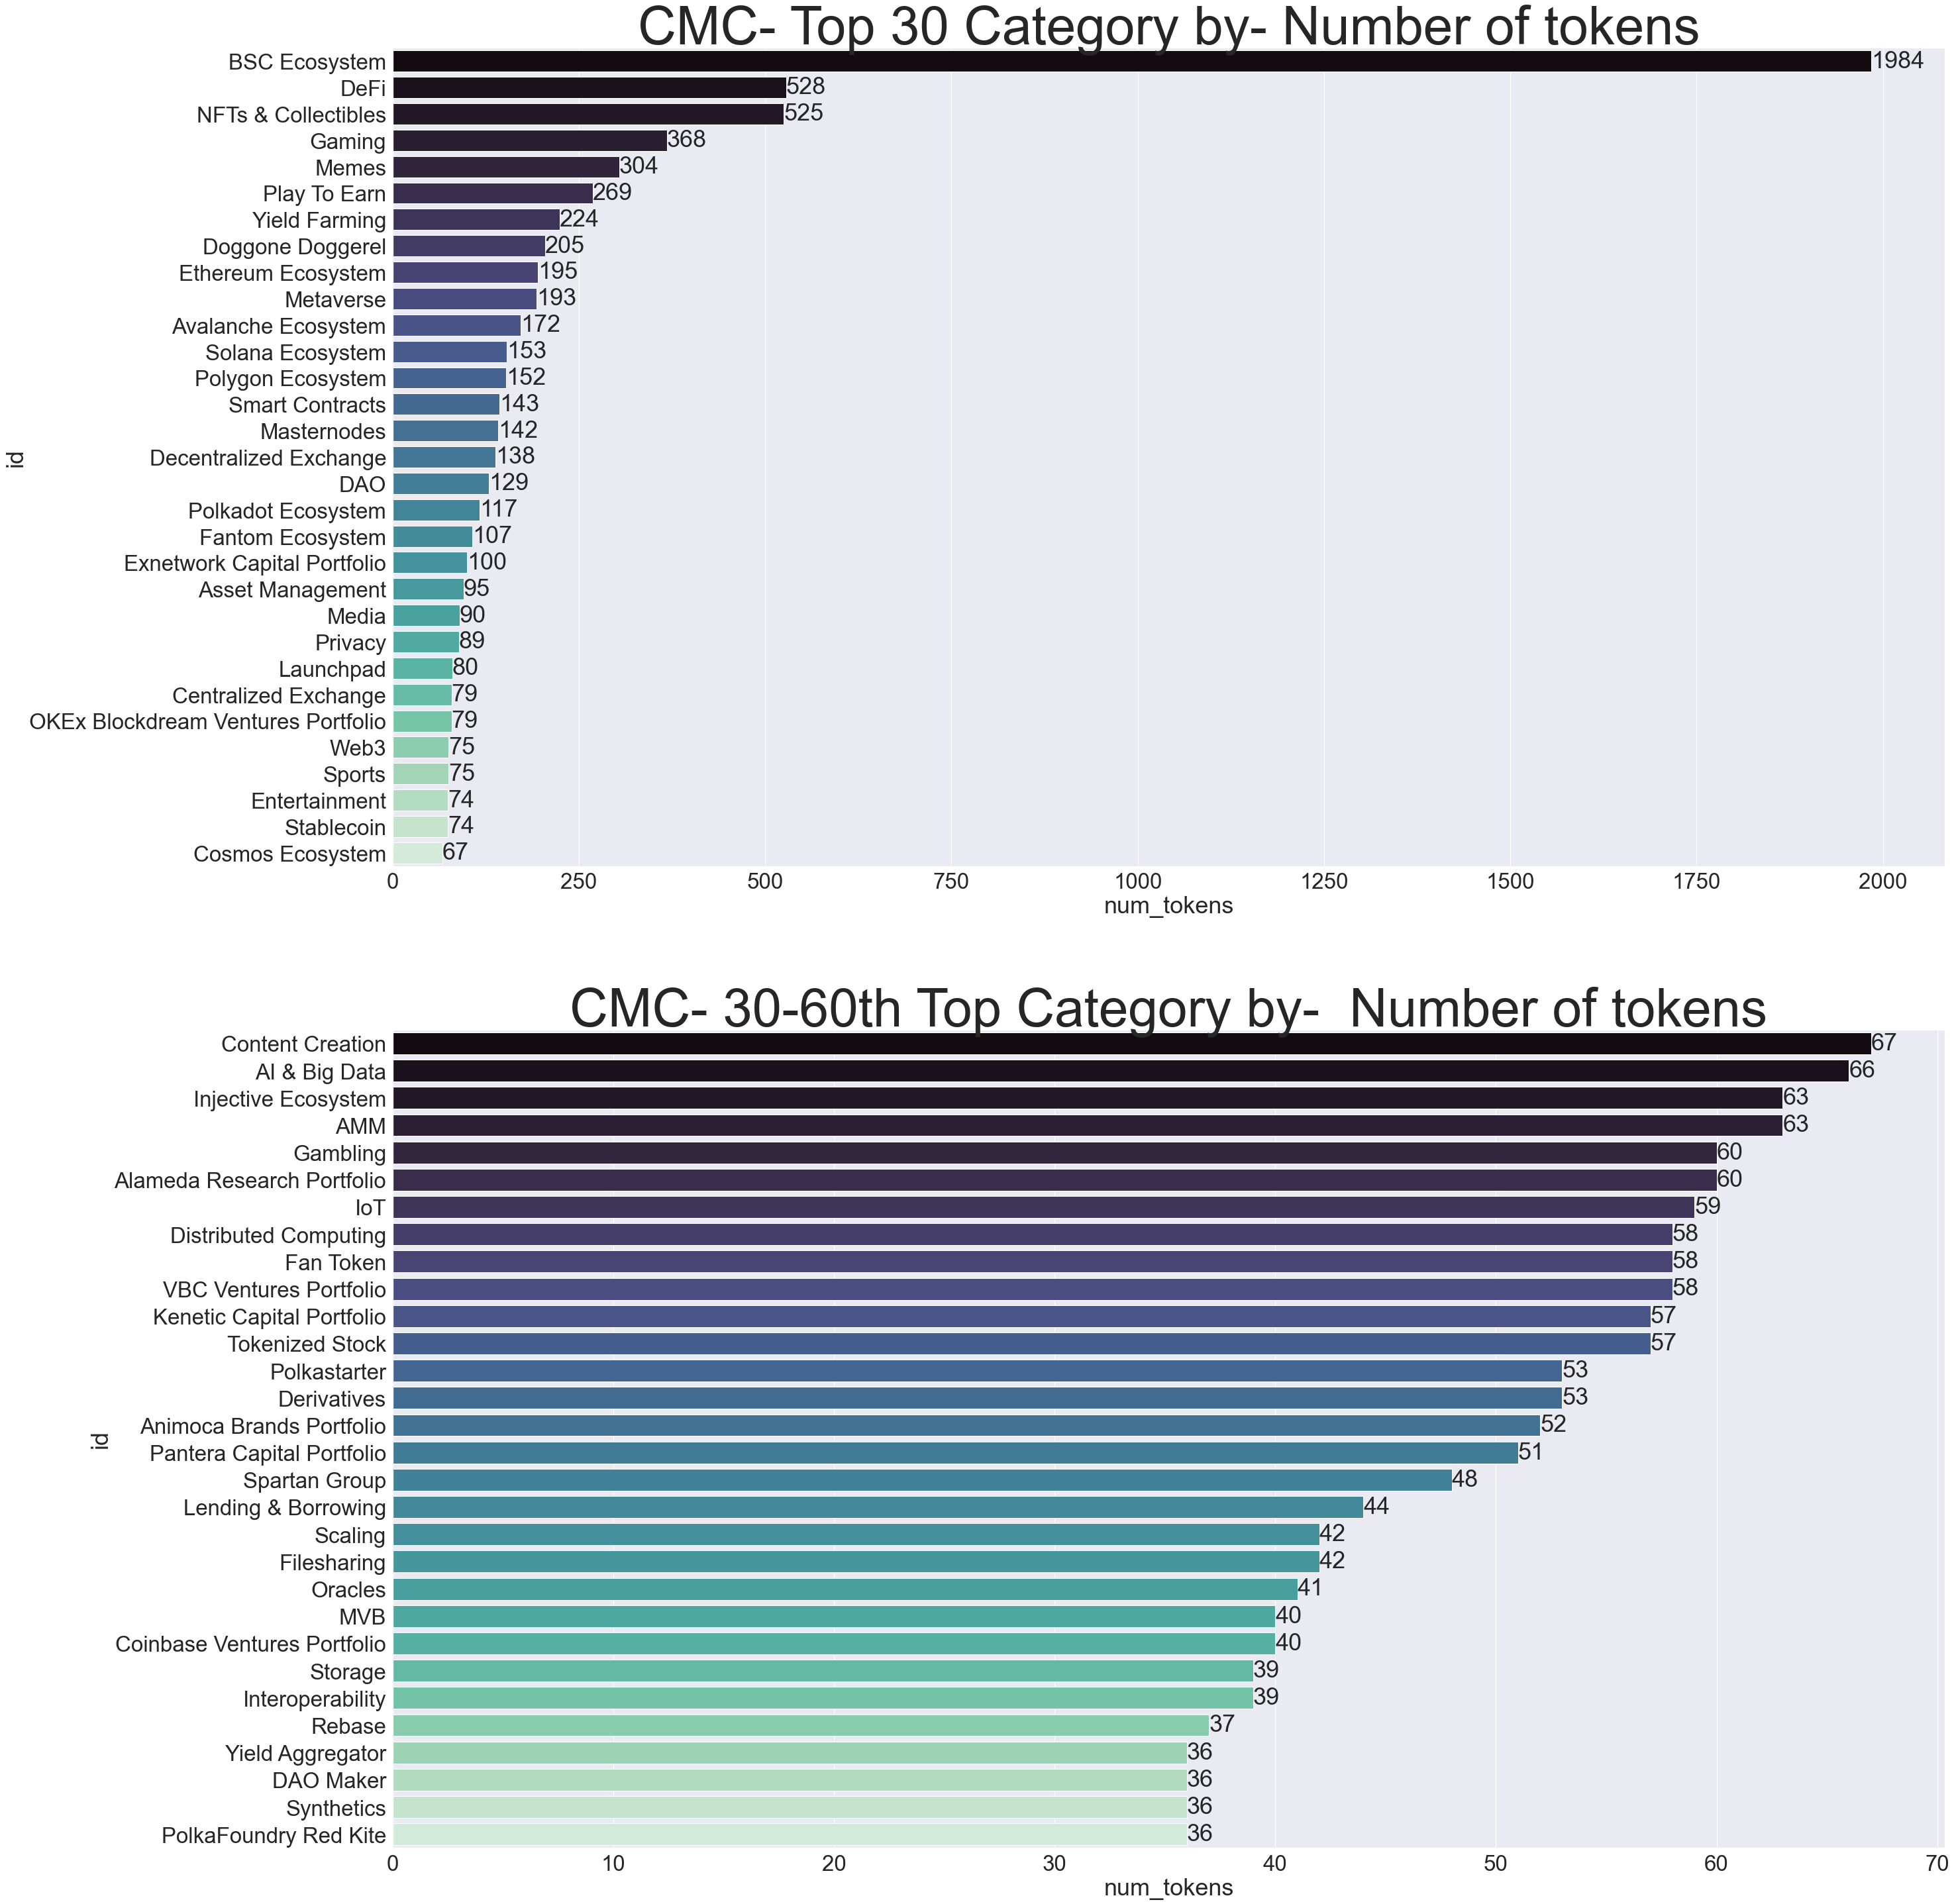

In [139]:
token_num_data = full_coin_cat_df.sort_values(by = 'num_tokens', ascending=False)
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize =(42,50))
sns.barplot( token_num_data.num_tokens[:31],token_num_data.id[:31], ax = ax, palette = "mako" )
sns.barplot( token_num_data.num_tokens[31:61],token_num_data.id[31:61], ax = ax1, palette = "mako" )
#ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0, 700))

ax.bar_label(ax.containers[0], label_type= 'edge')
ax.set_title("CMC- Top 30 Category by- Number of tokens",fontsize=80)

ax1.bar_label(ax1.containers[0], label_type= 'edge')
ax1.set_title("CMC- 30-60th Top Category by-  Number of tokens",fontsize=80)

sns.set(font_scale = 3)
plt.show()

In [151]:
##ISSUE 
# This doesnt match with the meta category data.. if look into the coin list, there are 54 coins..
    #But from viz above we can see that this category has 63 tokens..
len(data['Injective Ecosystem']['data']['coins'])


54

#### Coins for each category   <a class="anchor" id="C5"></a>

In [19]:
df_full_categories = pd.read_csv("CMC_categories_list.csv")
# Reading the saved Json file
with open('CMC_coins_by_category_raw.json') as json_file:
    data = json.load(json_file) 
#     data = json.loads(data) #this is crucial to parse it back to dictionary! 
data.keys()

dict_keys(['Injective Ecosystem', 'Oxbull', 'OKEx Blockdream Ventures Portfolio', 'Elrond Ecosystem', 'Spartan Group', 'Moonriver Ecosystem', 'VBC Ventures Portfolio', 'Kenetic Capital Portfolio', 'Harmony Ecosystem', 'Protocol-Owned Liquidity', 'DeFi 2.0', 'BlueZilla', 'Moon Knight Labs', 'Ferrum Network', 'TRON Ecosystem', 'Ethereum Ecosystem', 'Animoca Brands Portfolio', 'BullPerks Launchpad', 'MVB', 'Farastarter', 'LaunchZone', 'Celo Ecosystem', 'Near Protocol Ecosystem', 'Web3', 'Olympus Pro Ecosystem', 'Terra Ecosystem', 'Cardano Ecosystem', 'Icetea Labs', 'Play To Earn', 'Fantom Ecosystem', 'PetRock Capital Portfolio', 'Doggone Doggerel', 'Bounce Launchpad', 'Polygon Ecosystem', 'Genpad', 'Chromia Ecosystem', 'HECO Ecosystem', 'PolkaFoundry Red Kite', 'Hacken Foundation', 'Trustswap Launchpad', 'Exnetwork Capital Portfolio', 'Poolz Finance Portfolio', 'DuckSTARTER', 'Paradigm Portfolio', 'ParaFi Capital', 'Multicoin Capital Portfolio', 'Pantera Capital Portfolio', 'Placeholder V

In [187]:
jprint(data['Injective Ecosystem']['data']['coins'][0])
#     "name": "Ethereum",
#     "symbol": "ETH",
total_coins = 0 
for cat in list(data.keys()):
    total_coins+=len(data[cat]['data']['coins'])
print("total_coins: ", total_coins)
                

{
    "id": 1027,
    "name": "Ethereum",
    "symbol": "ETH",
    "slug": "ethereum",
    "num_market_pairs": 5508,
    "date_added": "2015-08-07T00:00:00.000Z",
    "tags": [
        "mineable",
        "pow",
        "smart-contracts",
        "ethereum-ecosystem",
        "binance-smart-chain",
        "coinbase-ventures-portfolio",
        "three-arrows-capital-portfolio",
        "polychain-capital-portfolio",
        "binance-labs-portfolio",
        "blockchain-capital-portfolio",
        "boostvc-portfolio",
        "cms-holdings-portfolio",
        "dcg-portfolio",
        "dragonfly-capital-portfolio",
        "electric-capital-portfolio",
        "fabric-ventures-portfolio",
        "framework-ventures-portfolio",
        "hashkey-capital-portfolio",
        "kenetic-capital-portfolio",
        "huobi-capital-portfolio",
        "alameda-research-portfolio",
        "a16z-portfolio",
        "1confirmation-portfolio",
        "winklevoss-capital-portfolio",
        "usv-por

In [174]:
#practice
n = 0 
for category in list(data.keys()):
    #print(data[category])
    print("Category: ", category)
    for index, coin in enumerate(data[category]['data']['coins']):
#         market_cap = data[category]['data']['coins'][index]['quote']['USD']['market_cap']
#         price = market_cap = data[category]['data']['coins'][index]['quote']['USD']['price']
#         last_updated = market_cap = data[category]['data']['coins'][index]['quote']['USD']['last_updated']
#         name = data[category]['data']['coins'][index]['name']
#         symbol = data[category]['data']['coins'][index]['symbol']
        
        market_cap = coin['quote']['USD']['market_cap']
        price = market_cap = coin['quote']['USD']['price']
        last_updated = market_cap = coin['quote']['USD']['last_updated']
        name = coin['name']
        symbol = coin['symbol']
        print(name, symbol, market_cap, price, last_updated)
    print("")
    
    n+=1
    if (n==5): break

Category:  Injective Ecosystem
Ethereum ETH 2022-02-17T08:49:00.000Z 3056.581941152972 2022-02-17T08:49:00.000Z
Tether USDT 2022-02-17T08:49:00.000Z 1.0003770987190017 2022-02-17T08:49:00.000Z
Polygon MATIC 2022-02-17T08:49:00.000Z 1.7924779703487415 2022-02-17T08:49:00.000Z
TerraUSD UST 2022-02-17T08:49:00.000Z 0.9990808140814038 2022-02-17T08:49:00.000Z
Cosmos ATOM 2022-02-17T08:49:00.000Z 30.202637043542474 2022-02-17T08:49:00.000Z
Chainlink LINK 2022-02-17T08:49:00.000Z 16.681518083002885 2022-02-17T08:49:00.000Z
NEAR Protocol NEAR 2022-02-17T08:49:00.000Z 11.467286756941569 2022-02-17T08:49:00.000Z
Uniswap UNI 2022-02-17T08:49:00.000Z 10.913145617917598 2022-02-17T08:49:00.000Z
Fantom FTM 2022-02-17T08:49:00.000Z 2.100152773860447 2022-02-17T08:49:00.000Z
Elrond EGLD 2022-02-17T08:49:00.000Z 191.58439020726547 2022-02-17T08:49:00.000Z
Klaytn KLAY 2022-02-17T08:49:00.000Z 1.275802179500757 2022-02-17T08:49:00.000Z
The Graph GRT 2022-02-17T08:49:00.000Z 0.46890100707469295 2022-02-1

In [20]:
column_names= ['name', 'symbol', 'price', 'market_cap', 'last_updated', 'category']
full_coin_from_cat_df = pd.DataFrame(columns = column_names)
for category in list(data.keys()):
    #print(data[category])
    for coin in data[category]['data']['coins']:
        market_cap = coin['quote']['USD']['market_cap']
        price = coin['quote']['USD']['price']
        last_updated =  coin['quote']['USD']['last_updated']
        name = coin['name']
        symbol = coin['symbol']
        temp_df = pd.DataFrame(columns =column_names)
        temp_df.loc[len(temp_df)] = [name, symbol, price, market_cap, last_updated, category]
        full_coin_from_cat_df = pd.concat([temp_df,full_coin_from_cat_df], axis = 0)
            

In [22]:
full_coin_from_cat_df.shape

(5459, 6)

In [23]:
full_coin_from_cat_df.to_csv("CMC_coins_by_category.csv", index=False)

In [24]:
full_coin_from_cat_df = pd.read_csv("CMC_coins_by_category.csv")
full_coin_from_cat_df.head()

name symbol        price    market_cap  \
0  Rai Reflex Index    RAI     2.990394  7.815714e+07   
1          Flamingo    FLM     0.260358  8.130566e+07   
2            Linear   LINA     0.025645  8.369557e+07   
3       VVS Finance    VVS     0.000038  8.605437e+07   
4         DFI.Money   YFII  2246.750208  8.671557e+07   

               last_updated category  
0  2022-02-17T09:16:00.000Z     DeFi  
1  2022-02-17T09:16:00.000Z     DeFi  
2  2022-02-17T09:16:00.000Z     DeFi  
3  2022-02-17T09:16:00.000Z     DeFi  
4  2022-02-17T09:16:00.000Z     DeFi

#### Data Viz   <a class="anchor" id="C6"></a>

C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\crypto-dash\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


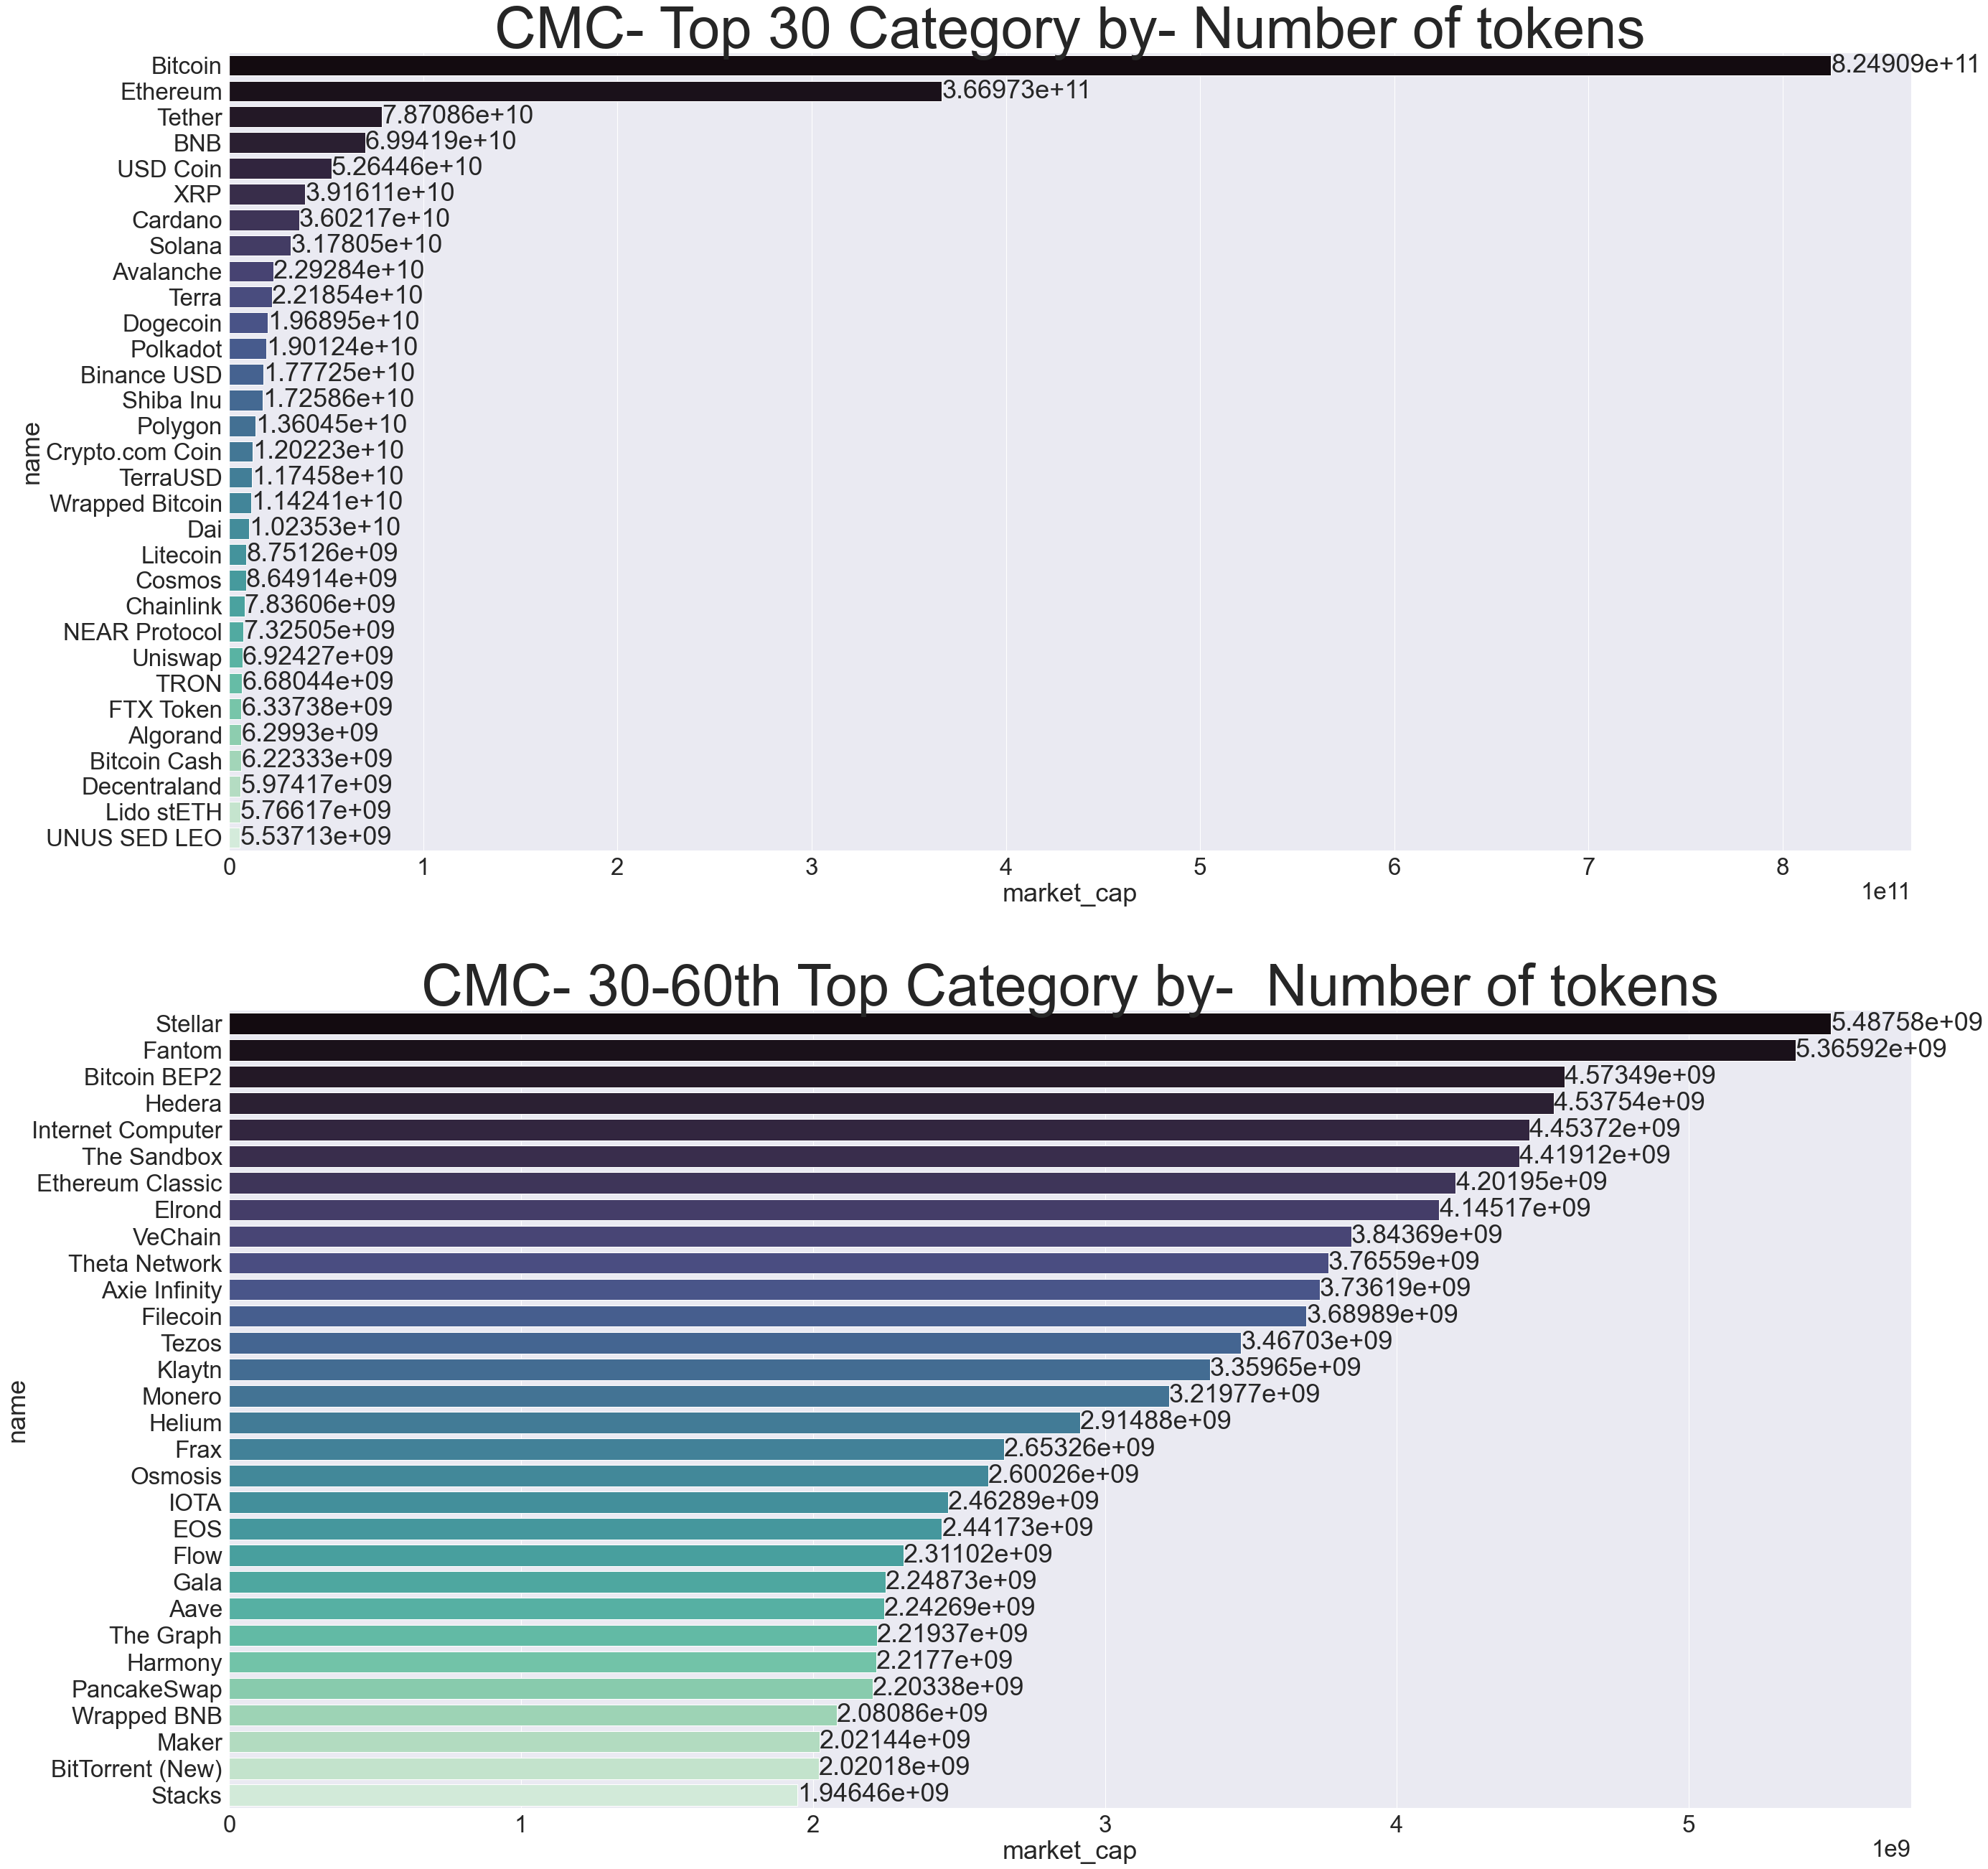

In [34]:
marketcap_data = full_coin_from_cat_df.sort_values(by = 'market_cap', ascending=False)
marketcap_data = marketcap_data.drop_duplicates('name')
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1,figsize =(42,45))
sns.barplot( marketcap_data.market_cap[:31],marketcap_data.name[:31], ax = ax, palette = "mako" )
sns.barplot( marketcap_data.market_cap[31:61],marketcap_data.name[31:61], ax = ax1, palette = "mako" )
#ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0, 700))

ax.bar_label(ax.containers[0], label_type= 'edge')
ax.set_title("CMC- Top 30 Category by- Number of tokens",fontsize=80)

ax1.bar_label(ax1.containers[0], label_type= 'edge')
ax1.set_title("CMC- 30-60th Top Category by-  Number of tokens",fontsize=80)

sns.set(font_scale = 3)
plt.show()

In [28]:
 marketcap_data

name     symbol         price    market_cap  \
2989        Bitcoin        BTC  43506.101653  8.249086e+11   
3612        Bitcoin        BTC  43483.804945  8.244858e+11   
3589        Bitcoin        BTC  43483.804945  8.244858e+11   
3575        Bitcoin        BTC  43483.804945  8.244858e+11   
3674        Bitcoin        BTC  43460.010783  8.240347e+11   
...             ...        ...           ...           ...   
4505     MagicCraft       MCRT      0.011393  0.000000e+00   
4504      linSpirit  LINSPIRIT      0.118303  0.000000e+00   
4503      FTMlaunch       FTML      0.006365  0.000000e+00   
4502  Staked Exodia      SEXOD   3664.210519  0.000000e+00   
3029   R U Generous        RUG      2.264088  0.000000e+00   

                  last_updated                      category  
2989  2022-02-17T09:04:00.000Z        Binance Labs Portfolio  
3612  2022-02-17T09:01:00.000Z        CMS Holdings Portfolio  
3589  2022-02-17T09:01:00.000Z             BoostVC Portfolio  
3575  2022-02-17T09:01:00.000Z  Blockchain Capital Portfolio  
3674  2022-02-17T09:00:00.000Z   DragonFly Capital Portfolio  
...                        ...                           ...  
4505  2022-02-17T08:54:00.000Z              Fantom Ecosystem  
4504  2022-02-17T08:54:00.000Z              Fantom Ecosystem  
4503  2022-02-17T08:54:00.000Z              Fantom Ecosystem  
4502  2022-01-18T21:15:00.000Z              Fantom Ecosystem  
3029  2022-02-17T09:04:00.000Z           Avalanche Ecosystem  

[5459 rows x 6 columns]

In [29]:
marketcap_data.drop_duplicates('name')

name     symbol         price    market_cap  \
2989        Bitcoin        BTC  43506.101653  8.249086e+11   
2988       Ethereum        ETH   3067.951102  3.669732e+11   
1111         Tether       USDT      1.000452  7.870864e+10   
3834            BNB        BNB    423.590615  6.994191e+10   
429        USD Coin       USDC      0.999520  5.264462e+10   
...             ...        ...           ...           ...   
4505     MagicCraft       MCRT      0.011393  0.000000e+00   
4504      linSpirit  LINSPIRIT      0.118303  0.000000e+00   
4503      FTMlaunch       FTML      0.006365  0.000000e+00   
4502  Staked Exodia      SEXOD   3664.210519  0.000000e+00   
3029   R U Generous        RUG      2.264088  0.000000e+00   

                  last_updated                    category  
2989  2022-02-17T09:04:00.000Z      Binance Labs Portfolio  
2988  2022-02-17T09:04:00.000Z      Binance Labs Portfolio  
1111  2022-02-17T09:14:00.000Z                  Stablecoin  
3834  2022-02-17T08:58:00.000Z  Alameda Research Portfolio  
429   2022-02-17T09:16:00.000Z               BSC Ecosystem  
...                        ...                         ...  
4505  2022-02-17T08:54:00.000Z            Fantom Ecosystem  
4504  2022-02-17T08:54:00.000Z            Fantom Ecosystem  
4503  2022-02-17T08:54:00.000Z            Fantom Ecosystem  
4502  2022-01-18T21:15:00.000Z            Fantom Ecosystem  
3029  2022-02-17T09:04:00.000Z         Avalanche Ecosystem  

[2724 rows x 6 columns]